In [ ]:
pip install ..

In [1]:
import _pickle

In [2]:
def load_pickle(file_name):
    with open(file_name, 'rb') as fid:
        dump = _pickle.load(fid)
    return dump

In [3]:
tracks = load_pickle('/home/paul/Desktop/scored_behaviors/Round_1_July_2_Tank_2/GH039931.MP4_reencode_Hanna_final_15_fish_renumbered.pkl')

In [7]:
import numpy as np

from pyTrajectory.config import cfg


cfg.trajectory_keys = ('FRAME_IDX',
                       'KEYPOINTS')

# and define their use cases
cfg.key_time_stamp = 'FRAME_IDX'
cfg.key_category = None
cfg.key_score = None
cfg.key_box = None
cfg.key_keypoints = 'KEYPOINTS'
cfg.key_keypoints_line = 'KEYPOINTS'


from pyTrajectory.trajectory import Trajectory
from pyTrajectory.instance import Instance
from pyTrajectory.io import load_trajectories

In [8]:
import matplotlib.pyplot as plt

In [9]:
trajectories = {}

for key in tracks['IDENTITIES']:
    trajectories[key] = Trajectory().load(data=tracks[str(key)])

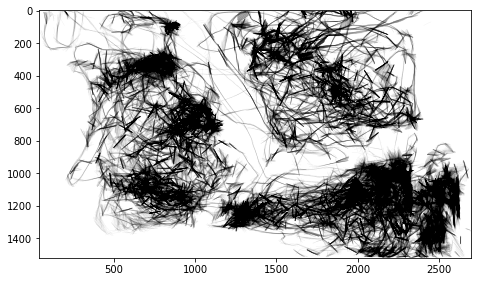

In [10]:
# some visualization example

from pyTrajectory.visualization import get_trajectory_range, add_collection

from matplotlib import collections
import matplotlib.pyplot as plt

xlim = []
ylim = []

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for idx, trajectory in enumerate(trajectories.values()):
        
    xlim_t, ylim_t = get_trajectory_range(trajectory)
    xlim.append(xlim_t)
    ylim.append(ylim_t)
    
    add_collection(ax,
                   collections.LineCollection,
                   trajectory,
                   cfg.key_keypoints,
                   color='k',
                   linewidth=0.5,
                   alpha=0.05)

ax.set_xlim(min([x[0] for x in xlim]), max([x[1] for x in xlim]))
ax.set_ylim(min([y[0] for y in ylim]), max([y[1] for y in ylim]))

ax.set_aspect('equal')
ax.invert_yaxis()  # image y coordinates are "upside down"

plt.show()

In [11]:
trajectories.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [12]:
from pyTrajectory.trajectory_operations import (get_posture_angles,
                                                get_posture_distance,
                                                get_posture_alignment,
                                                get_target_angle)

In [17]:
import pandas as pd

rename_columns = {'behavior': 'Behavior',
                  'category': 'Behavioral category',
                  'subject': 'Subject',
                  'modifier': 'Modifiers',
                  'start': 'Start (s)',
                  'stop': 'Stop (s)'}

behavior_data = pd.read_csv('/home/paul/Desktop/scored_behaviors/Round_1_July_2_Tank_2/GH039931.MP4_reencode_aggregated_minues_0-6_scored.csv')

fps = behavior_data['FPS'][0]

for key, column in rename_columns.items():
    behavior_data[key] = behavior_data[column]
    
behavior_data = behavior_data.drop([column for column in behavior_data.columns if column not in rename_columns], axis=1)

behavior_data = behavior_data.loc[np.isfinite(behavior_data['modifier'])]
behavior_data['modifier'] = behavior_data['modifier'].astype(int)

behavior_data = behavior_data.reset_index(drop=True)

In [18]:
behavior_data.loc[behavior_data['subject'] == 0, 'subject'] = 15
behavior_data.loc[behavior_data['modifier'] == 0, 'modifier'] = 15

In [258]:
behavior_duration_95 = np.quantile((behavior_data['stop'] - behavior_data['start']) * fps, 0.95)
behavior_duration_80 = np.quantile((behavior_data['stop'] - behavior_data['start']) * fps, 0.8)

In [248]:
from pyTrajectory.series_operations import filter_series, interpolate_series, smooth_series

def get_mask(series, use_filter=True):
    if use_filter:
        series = filter_series(series, lower=0.1, upper=0.9, window_size=11)
    return np.isfinite(series).all(axis=(1, 2))


from pyTrajectory.trajectory_operations import (get_posture_angles,
                                                get_posture_distance,
                                                get_posture_alignment,
                                                get_target_angle)

In [249]:
smoothing_func = lambda s: bn.move_mean(s, window=5, min_count=1)

In [ ]:
#     xlim = []
#     ylim = []

#     fig = plt.figure()
#     ax = fig.add_axes([0, 0, 1, 1])
    
#     for trajectory, color in zip([trajectory_subject, trajectory_modifier], ['r', 'k']):
        
#         if len(trajectory) == 0:
#             continue
            
#         xlim_t, ylim_t = get_trajectory_range(trajectory)
#         xlim.append(xlim_t)
#         ylim.append(ylim_t)

#         add_collection(ax,
#                        collections.LineCollection,
#                        trajectory,
#                        cfg.key_keypoints,
#                        color=color,
#                        linewidth=2,
#                        alpha=0.1)
    
#     print(len(trajectory_subject), len(trajectory_modifier))
    
#     for trajectory, color in zip([trajectory_subject, trajectory_modifier], ['r', 'k']):
        
#         if len(trajectory) == 0:
#             continue
            
#         xlim_t, ylim_t = get_trajectory_range(trajectory)
#         xlim.append(xlim_t)
#         ylim.append(ylim_t)

#         add_collection(ax,
#                        collections.LineCollection,
#                        trajectory,
#                        cfg.key_keypoints,
#                        color=color,
#                        linewidth=1,
#                        alpha=0.5)

#     ax.set_xlim(min([x[0] for x in xlim]) - 50, max([x[1] for x in xlim]) + 50)
#     ax.set_ylim(min([y[0] for y in ylim]) - 50, max([y[1] for y in ylim]) + 50)

#     ax.set_aspect('equal')
#     ax.invert_yaxis()  # image y coordinates are "upside down"
#     ax.set_title(behavior.behavior)

#     plt.show()

In [276]:
from pyTrajectory.trajectory import OutOfTrajectoryRange

In [352]:
measurement_data = []
behavior_labels = []

In [353]:
for idx, behavior in behavior_data.iterrows():
    
    try:
        trajectory_subject = trajectories[behavior['subject']]
        trajectory_modifier = trajectories[behavior['modifier']]
        
        event = (behavior['stop'] + behavior['start']) // 2
        start_95 = np.floor(int(fps * event) - behavior_duration_95 // 2)
        stop_95 = np.ceil(int(fps * event) + behavior_duration_95 // 2)
        start_80 = np.floor(int(fps * event) - behavior_duration_80 // 2)
        stop_80 = np.ceil(int(fps * event) + behavior_duration_80 // 2)
        
        trajectory_subject = trajectory_subject.interpolate().slice_window(start_80, stop_80, check_completeness=False)
        trajectory_modifier = trajectory_modifier.interpolate().slice_window(start_80, stop_80, check_completeness=False)

#         trajectory_subject = reconstruct_interpolated_trajectory(trajectory_subject, 5).slice_window(start_80, stop_80, check_completeness=False)
#         trajectory_modifier = reconstruct_interpolated_trajectory(trajectory_modifier, 5).slice_window(start_80, stop_80, check_completeness=False)
    
    except OutOfTrajectoryRange:
        print('trajectory out of range')
        continue
    
    if len(trajectory_subject) < 5 or len(trajectory_modifier) < 5:
        print('trajectory too short')
        continue
        
#     print(behavior['behavior'])
    
    posture_distance = get_posture_distance(trajectory_subject,
                                            trajectory_modifier,
                                            [0, 1, 2], [0, 1, 2])
    
#     plt.plot(posture_distance, '-k', alpha=0.4) 
#     plt.show()
    
    posture_angle = get_posture_angles(trajectory_subject, [0, 1, 2])
    
#     plt.plot(posture_angle, '-k', alpha=0.4) 
#     plt.show()
    
    posture_alignment = get_posture_alignment(trajectory_subject, trajectory_modifier, [0, 1, 2])
    
#     plt.plot(posture_alignment, '-k', alpha=0.4) 
#     plt.show()
    
    posture_alignment = get_target_angle(trajectory_subject, trajectory_modifier, [1, 0], [0, -1])
    
#     plt.plot(posture_alignment, '-k', alpha=0.4) 
#     plt.show()
    
    posture_speed = get_posture_speed(trajectory_subject)
    
#     plt.plot(posture_speed, '-k', alpha=0.4) 
#     plt.show()
    
    data = np.concatenate([measurement.reshape(len(trajectory_subject), -1) for measurement in
                           [posture_distance, posture_angle, posture_alignment, posture_alignment, posture_speed]],
                          axis=1)
    measurement_data.append(data)
    behavior_labels.append(behavior['behavior'])
    
#     break

In [354]:
measurement_data_concat = np.concatenate(measurement_data, axis=0)

In [355]:
from sklearn.preprocessing import MinMaxScaler

In [356]:
scaler = MinMaxScaler()
measurement_data_scaled = scaler.fit_transform(measurement_data_concat)

In [357]:
from sklearn.decomposition import PCA

pca = PCA(n_components=measurement_data_scaled.shape[1])

measurement_data_transformed = pca.fit_transform(measurement_data_scaled)

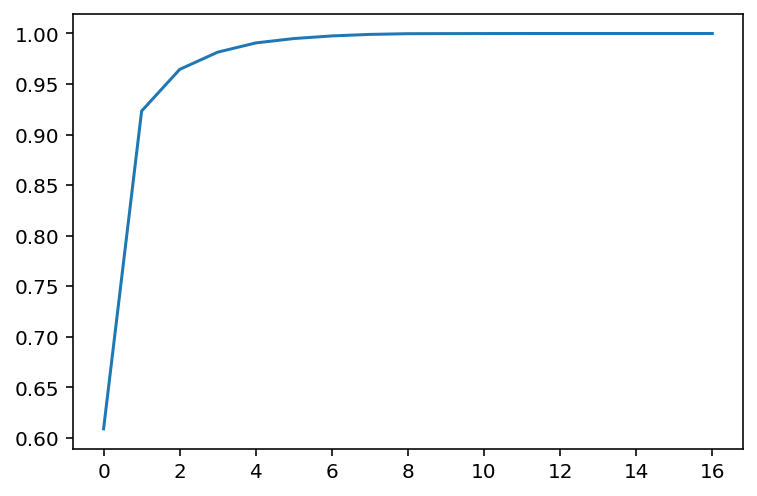

In [358]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [359]:
cutoff = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.99)

measurement_data_transformed = measurement_data_transformed[:, :cutoff]

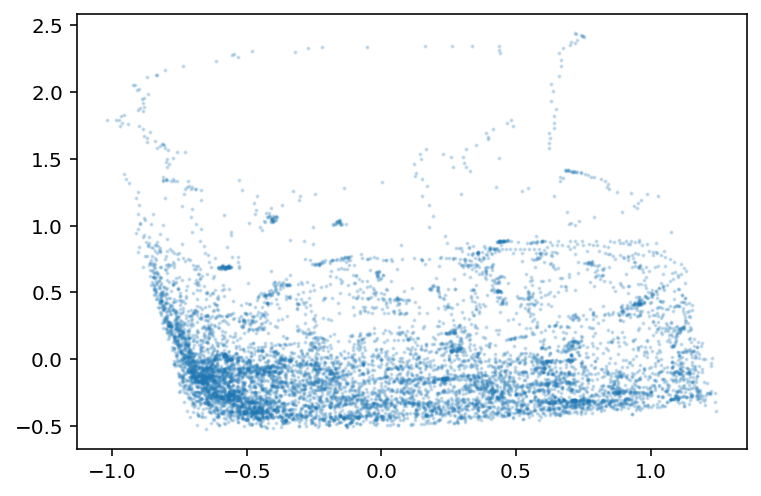

In [360]:
plt.scatter(*measurement_data_transformed[:, (0, 1)].T, s=1, alpha=0.2)

/home/paul/miniconda3/envs/fishtank/lib/python3.9/site-packages/mpl_toolkits/mplot3d/art3d.py:900: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/paul/miniconda3/envs/fishtank/lib/python3.9/site-packages/mpl_toolkits/mplot3d/art3d.py:902: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


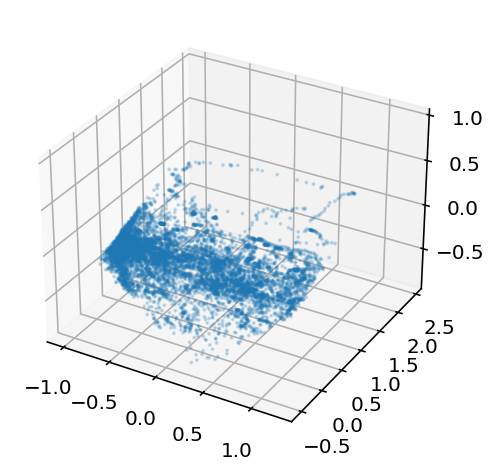

In [361]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(*measurement_data_transformed.T, s=1, alpha=0.2)

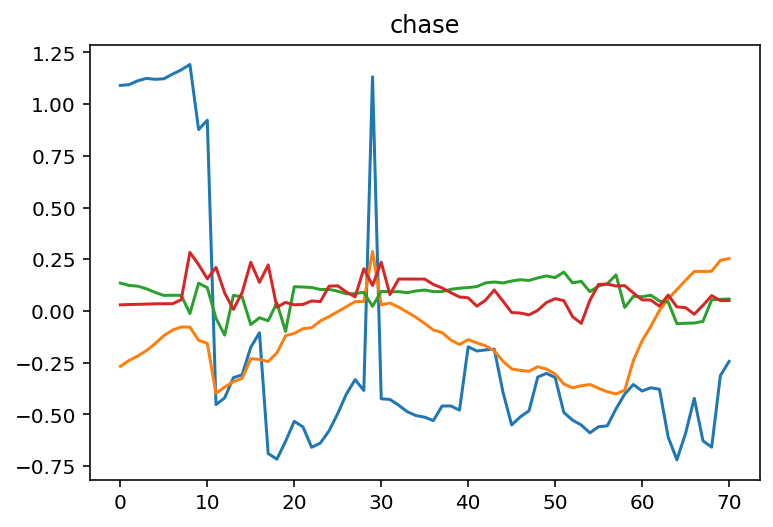

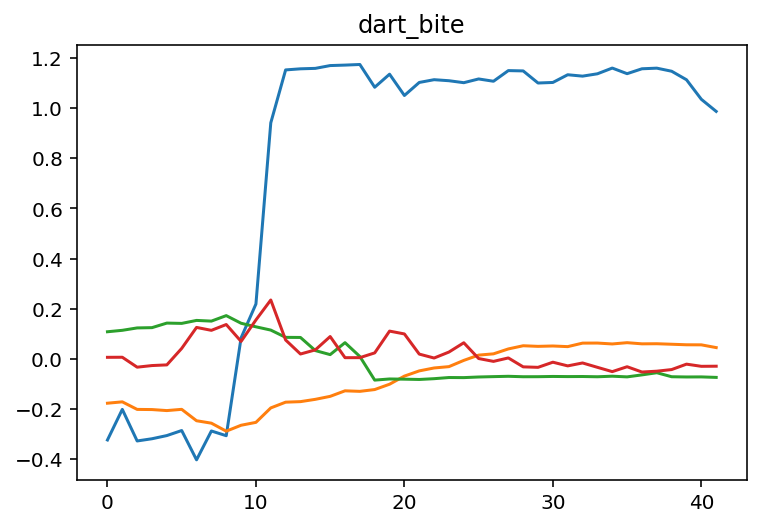

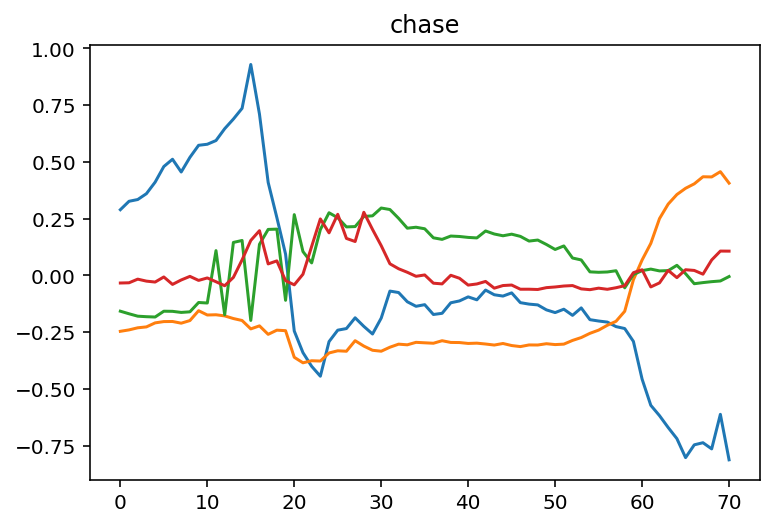

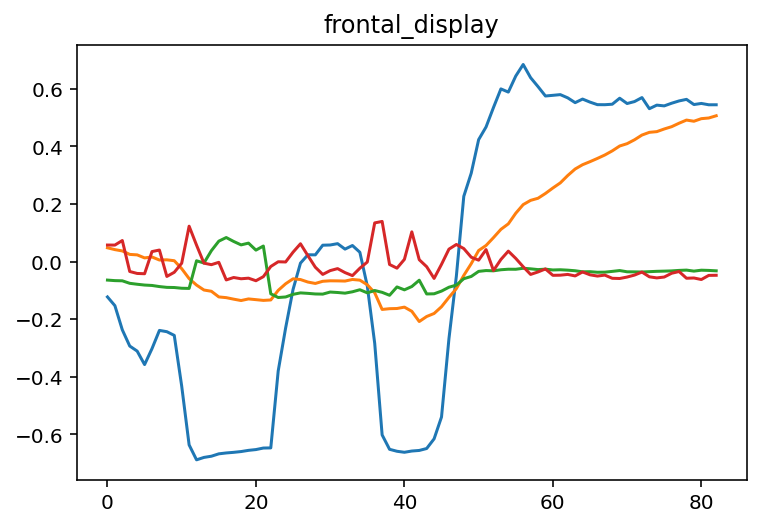

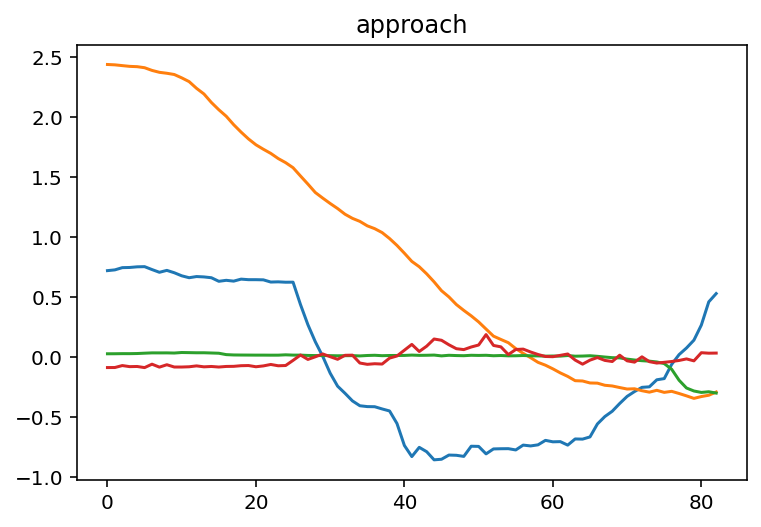

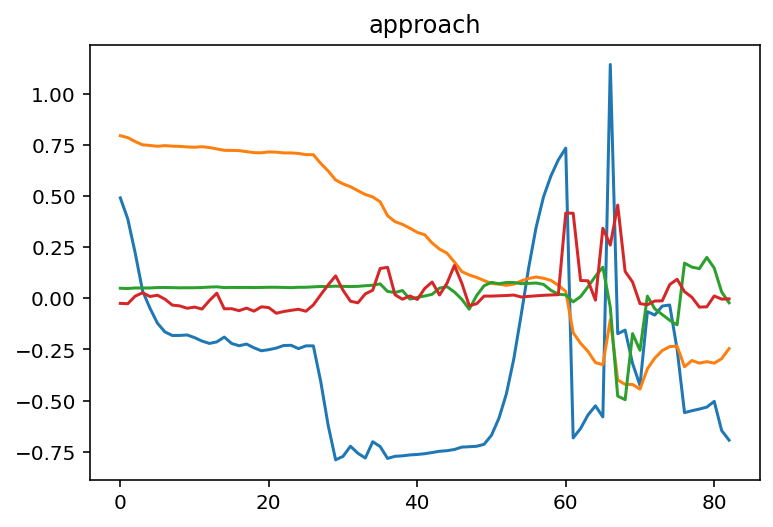

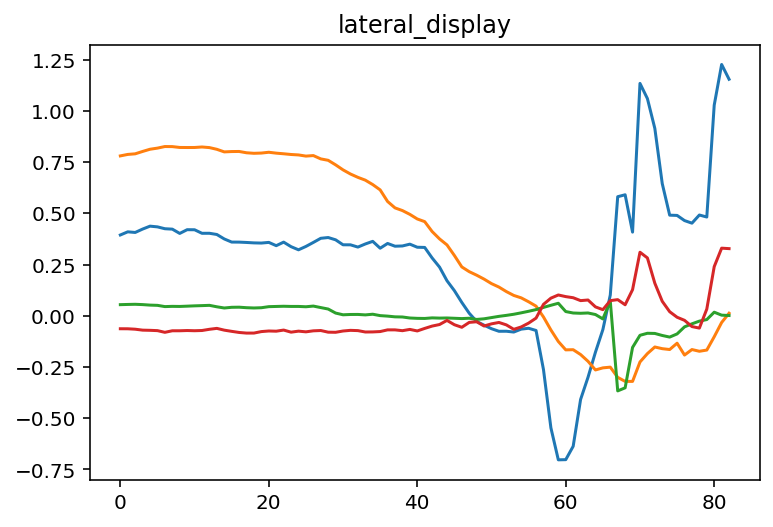

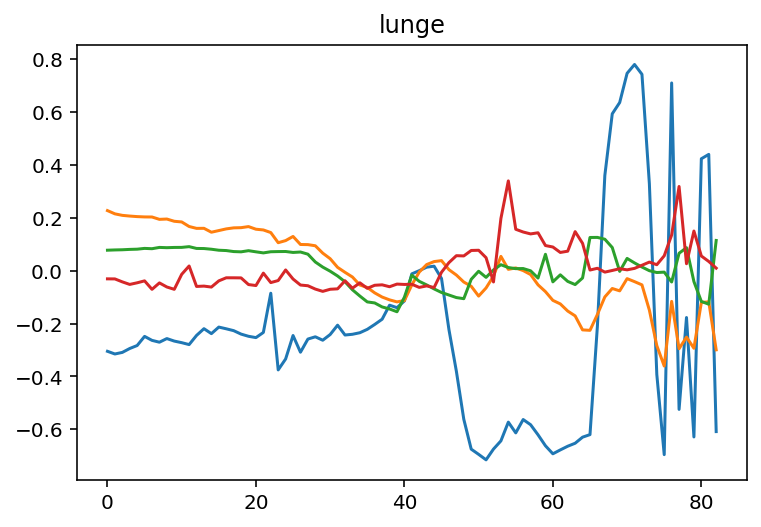

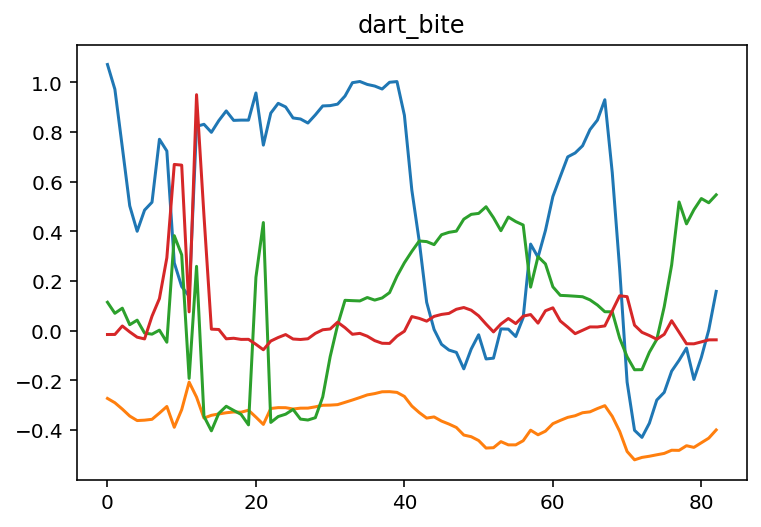

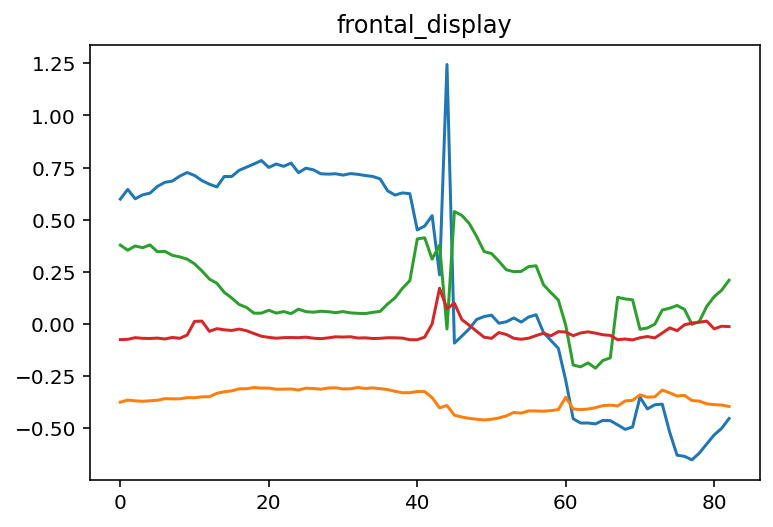

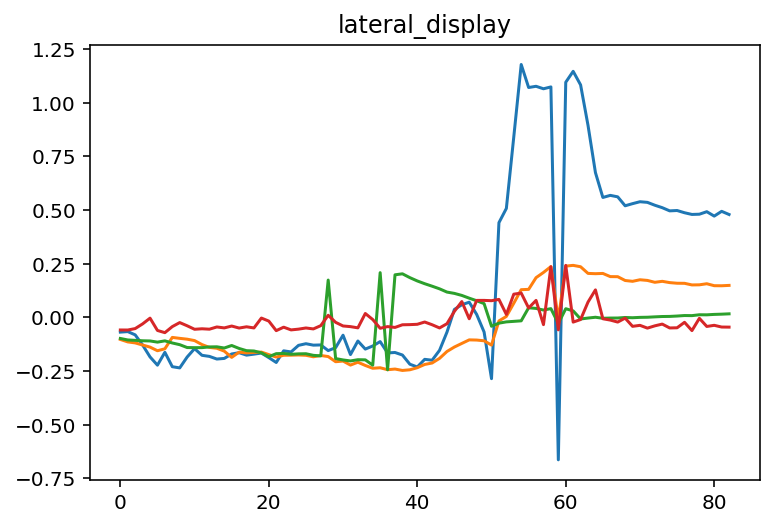

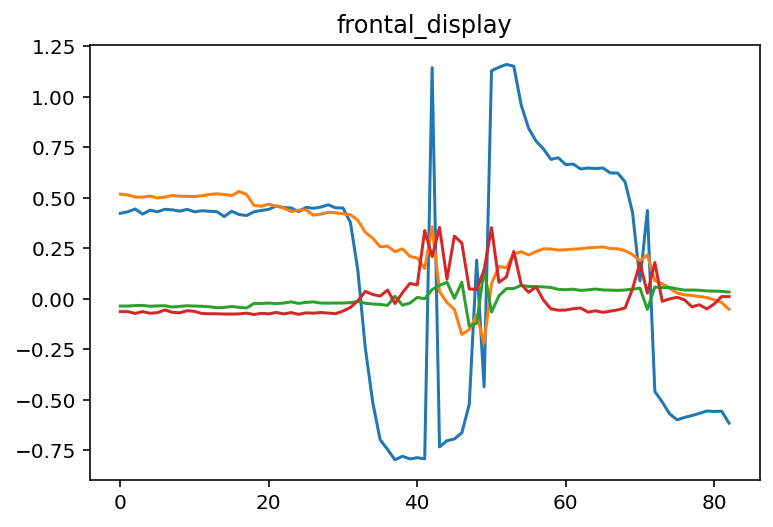

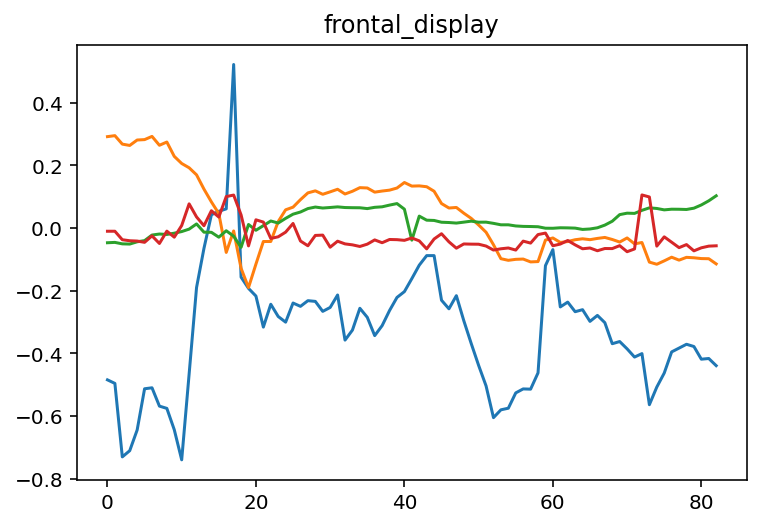

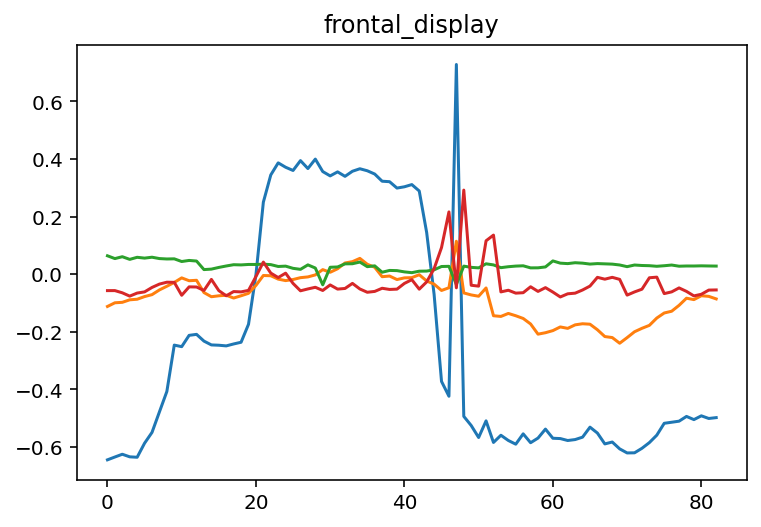

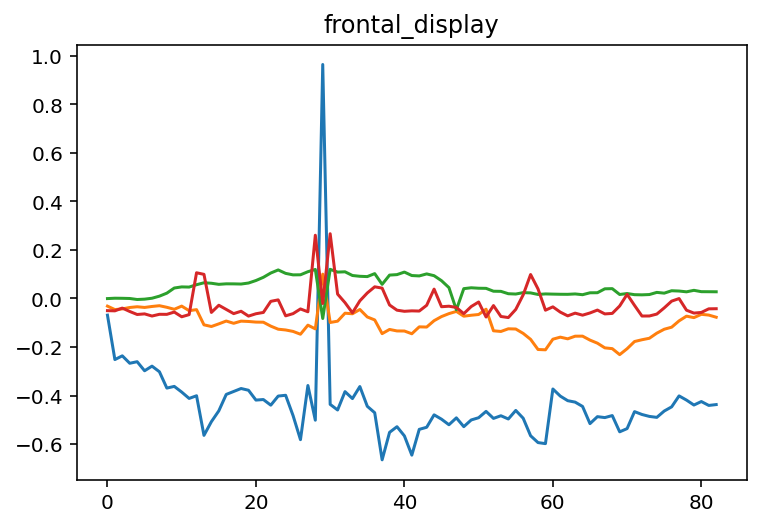

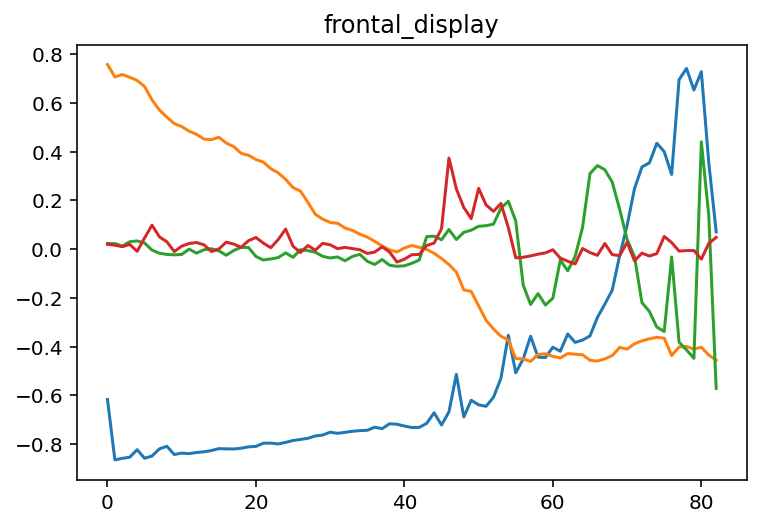

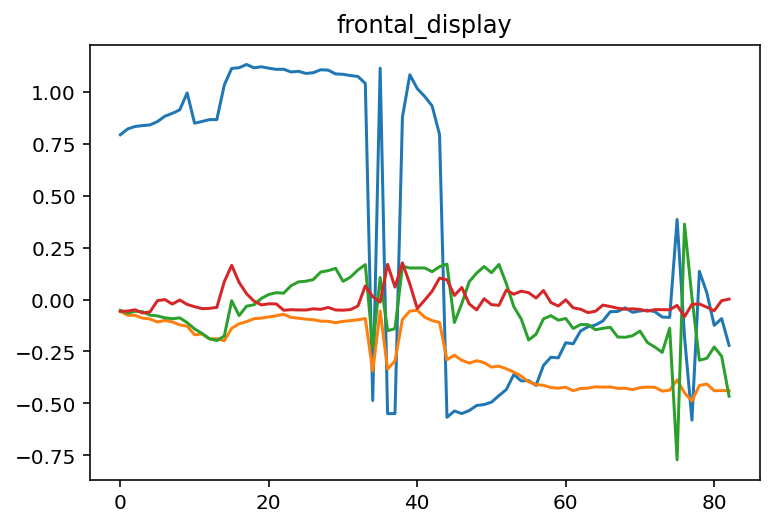

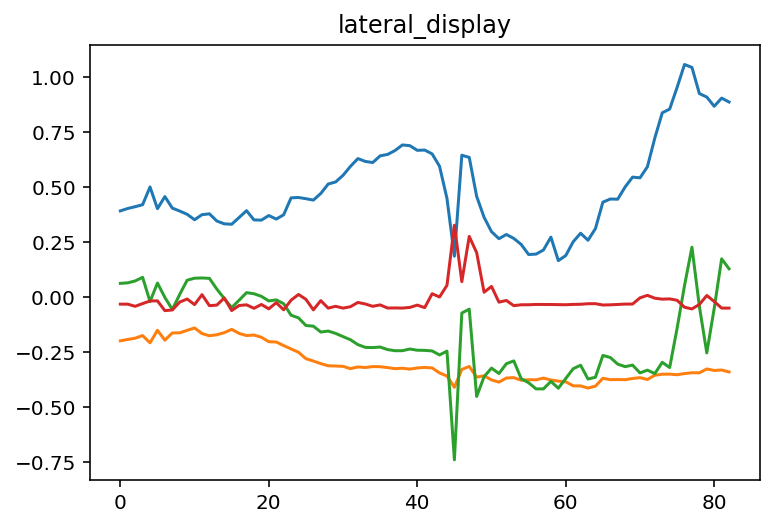

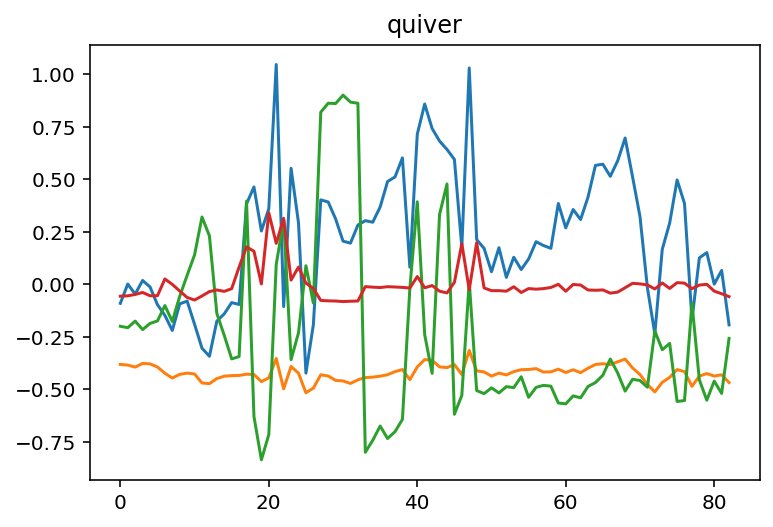

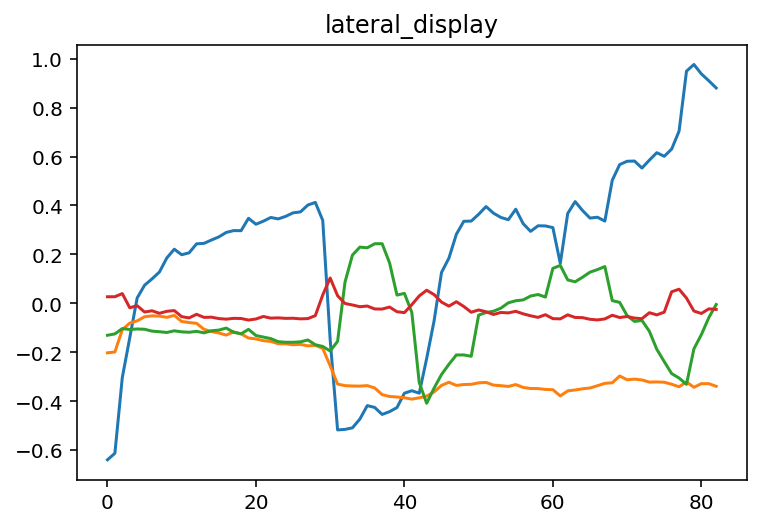

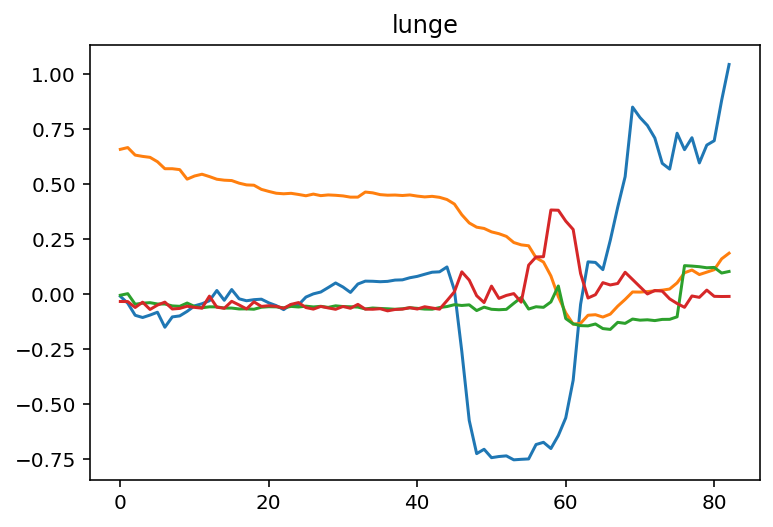

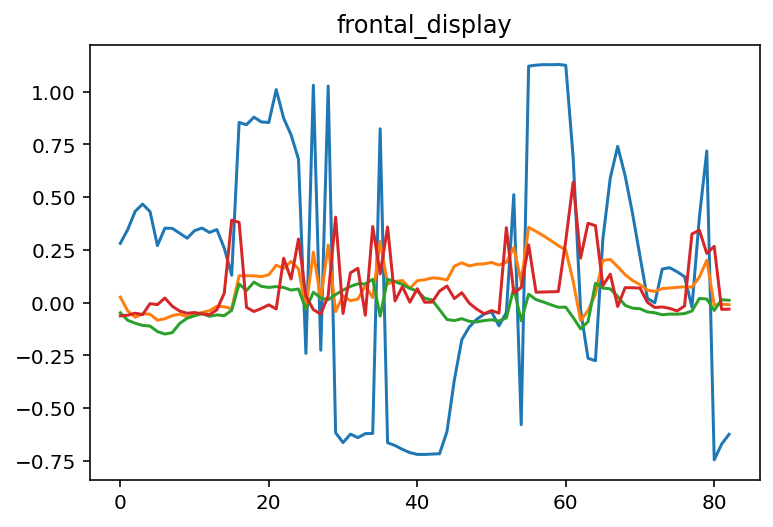

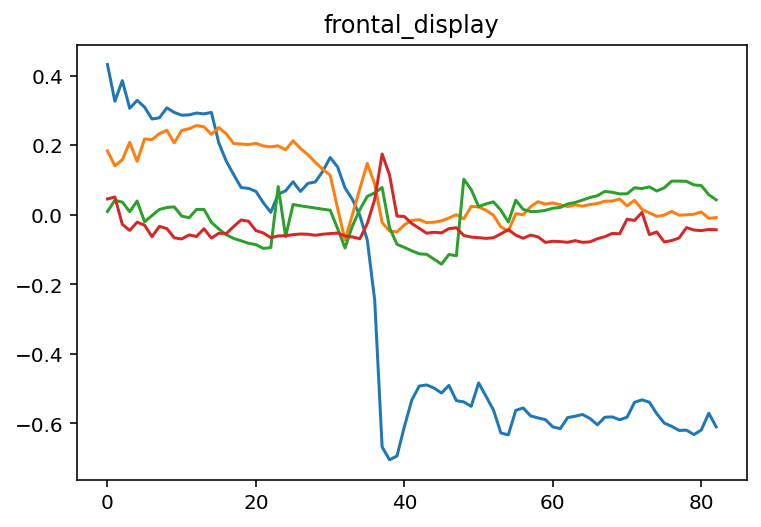

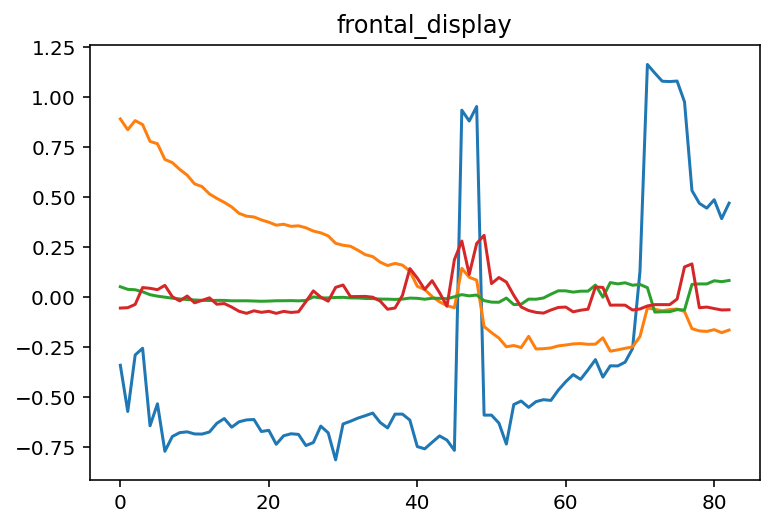

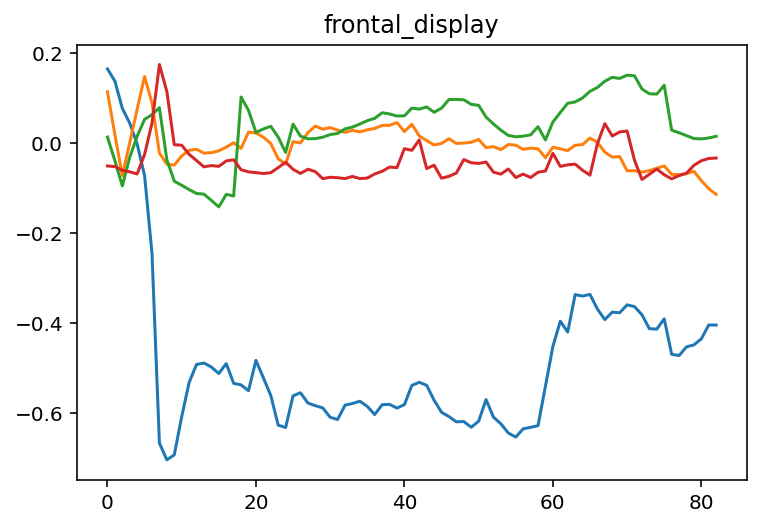

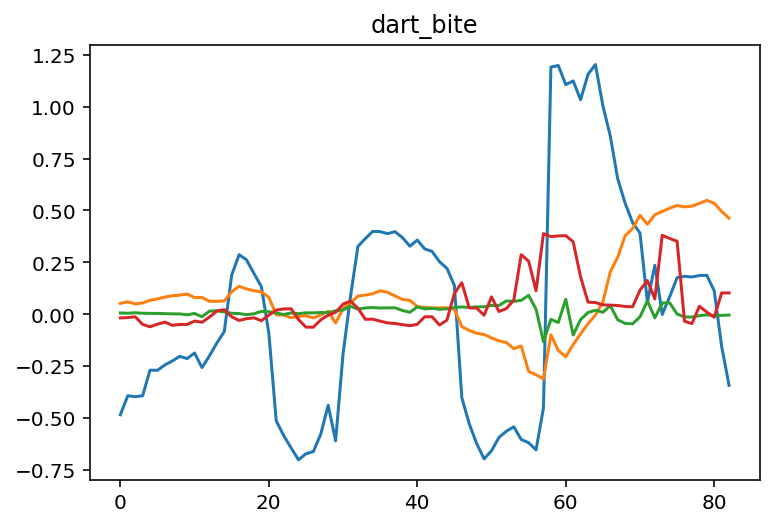

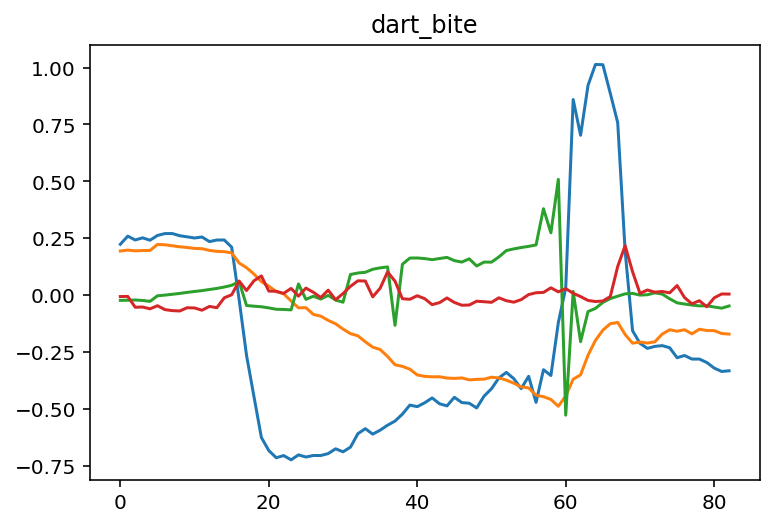

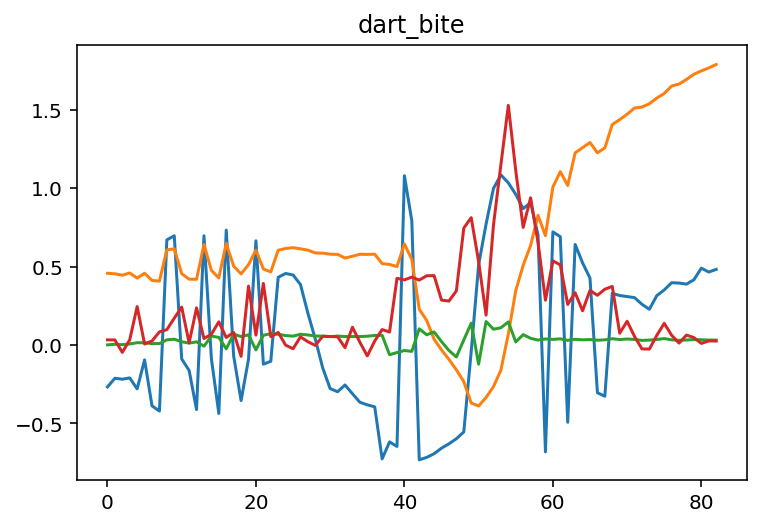

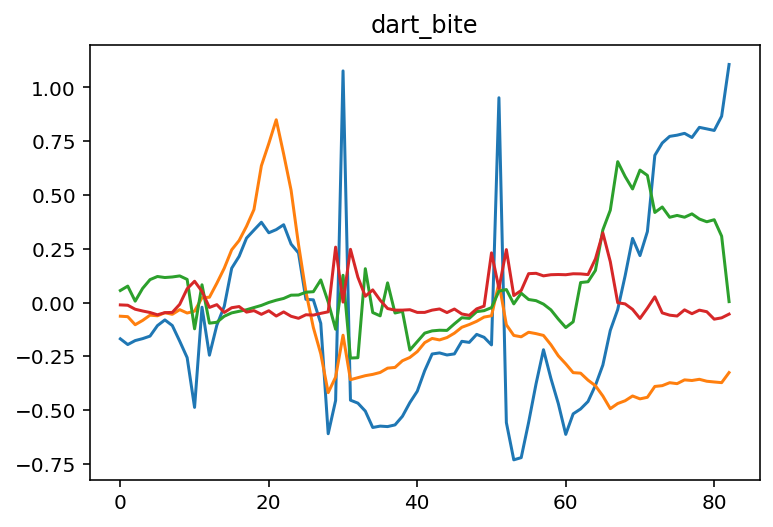

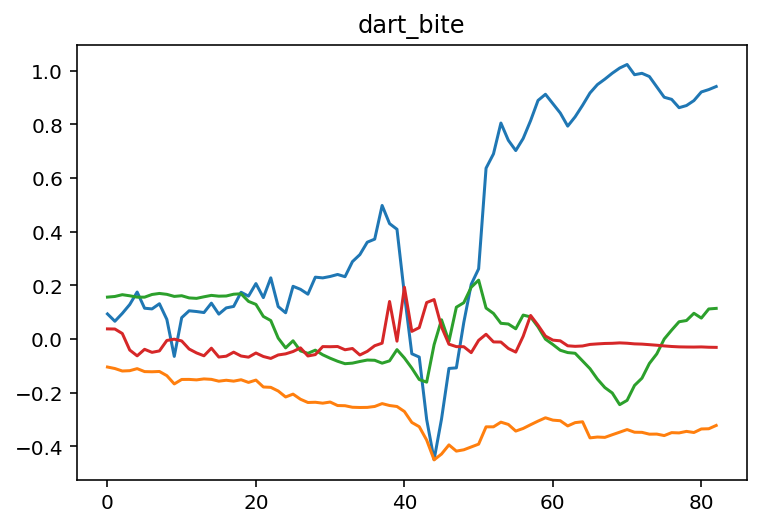

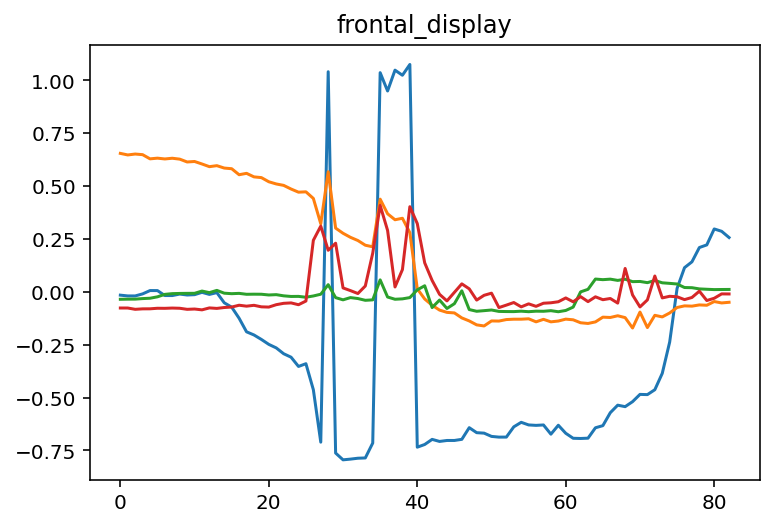

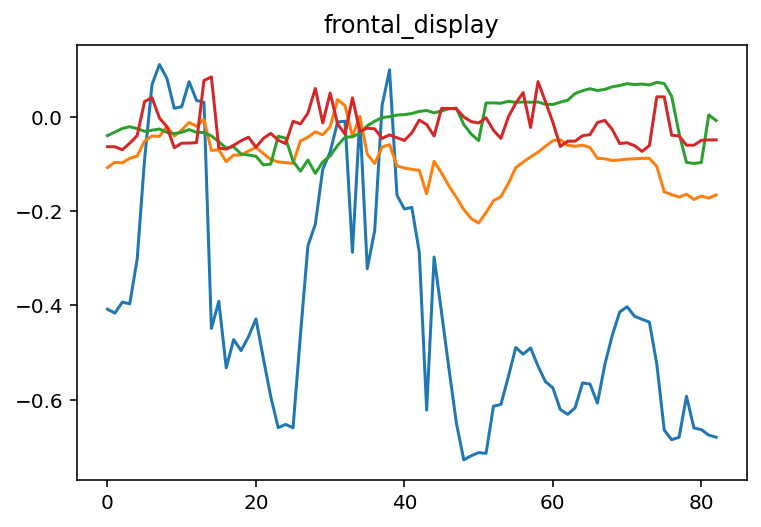

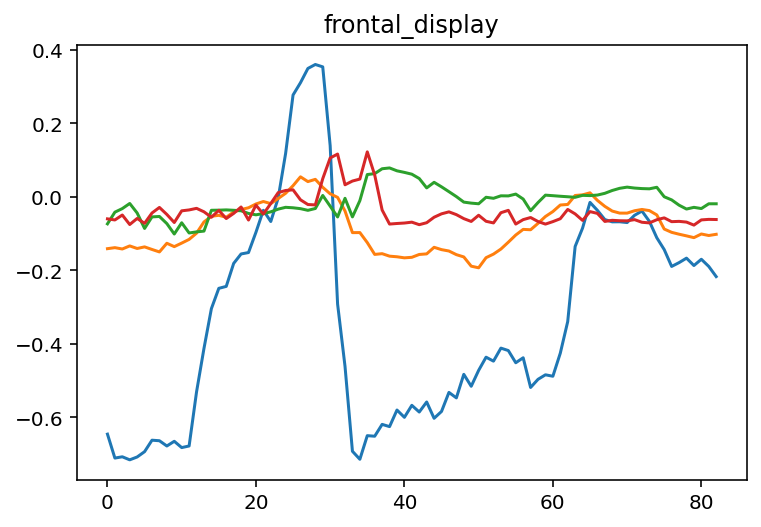

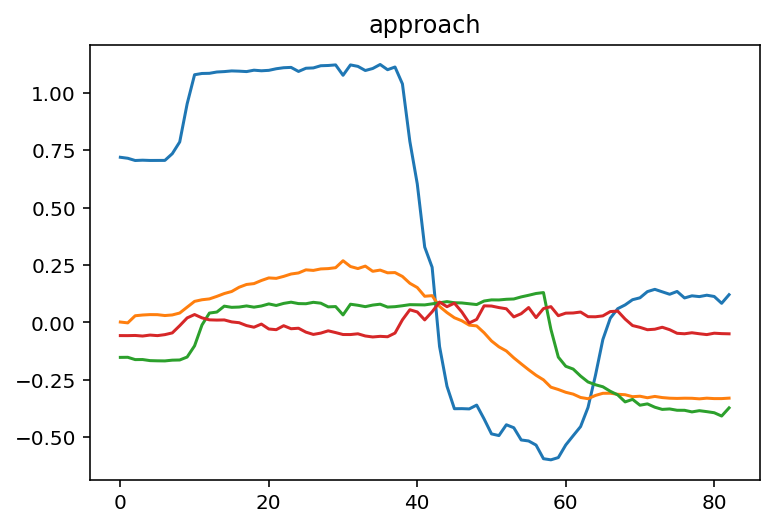

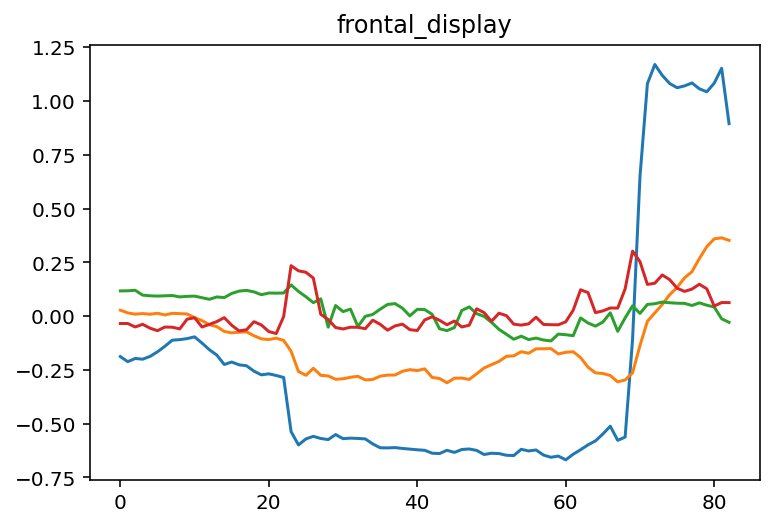

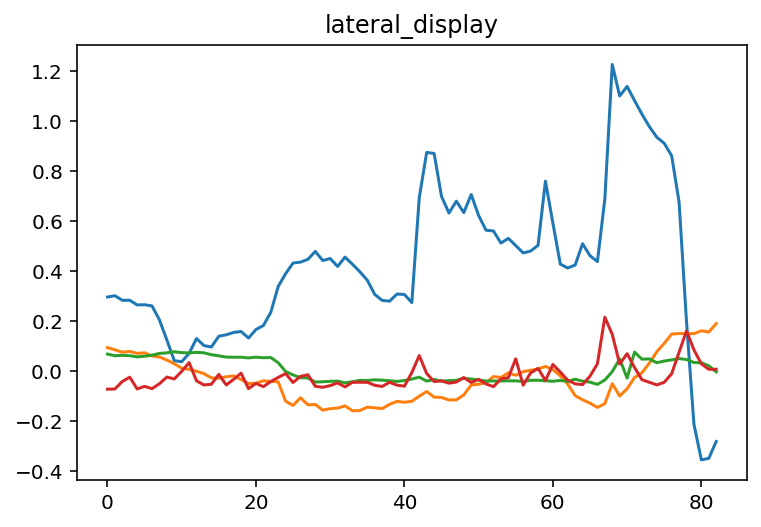

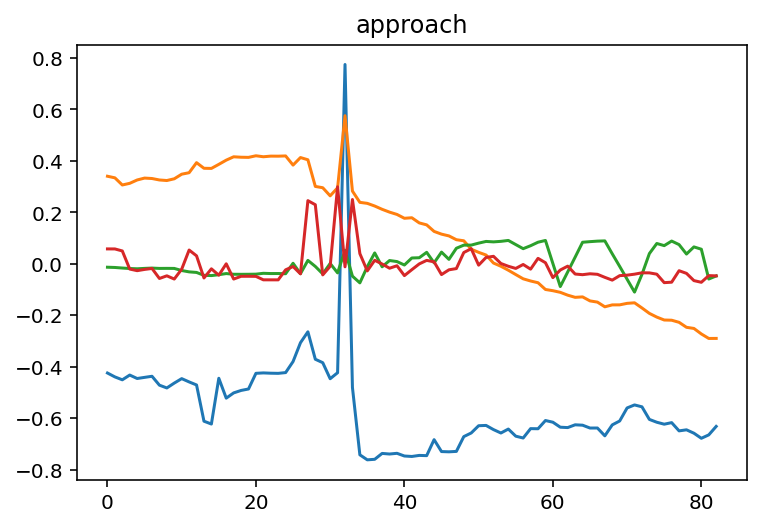

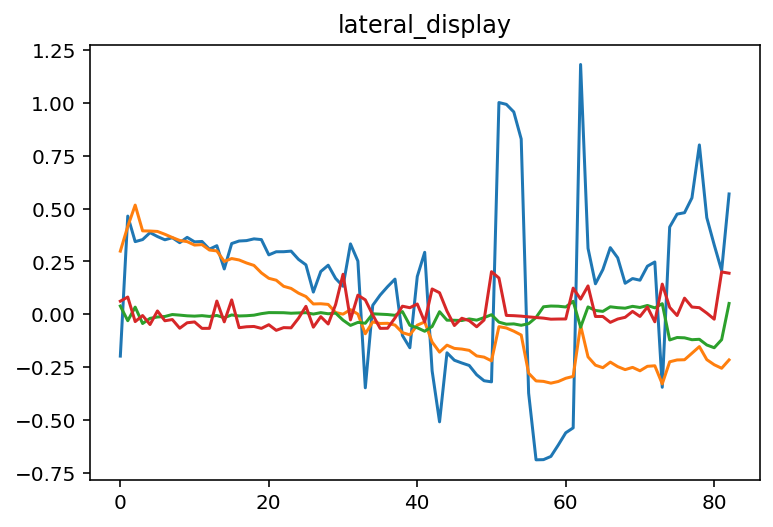

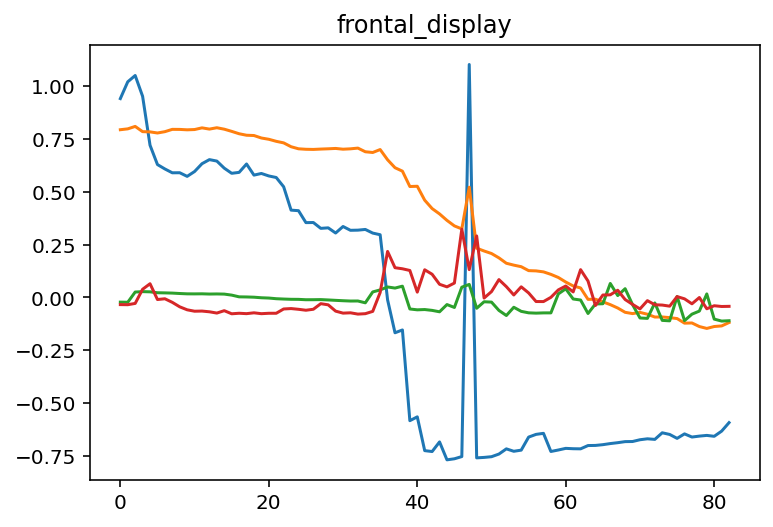

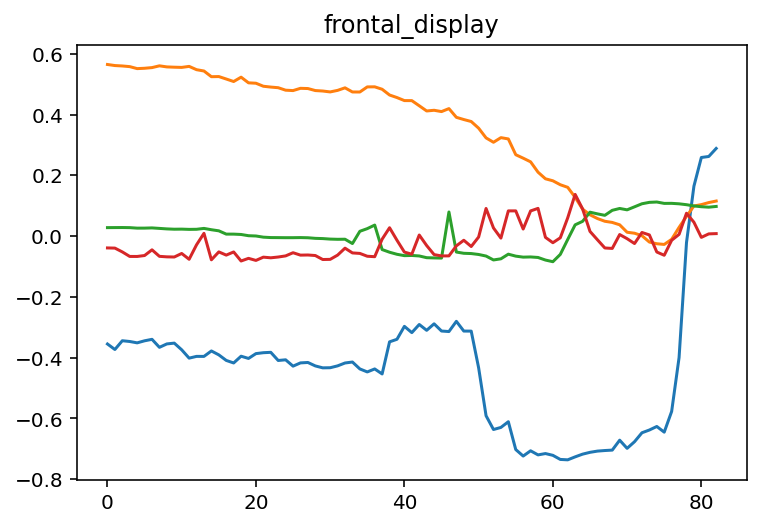

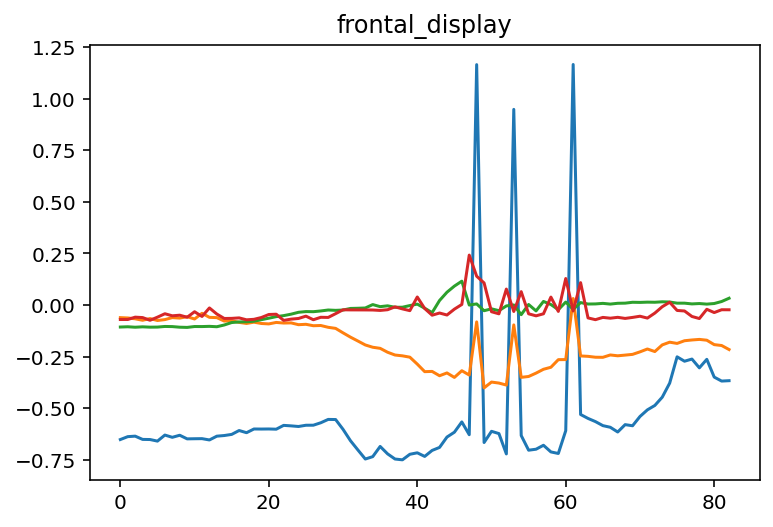

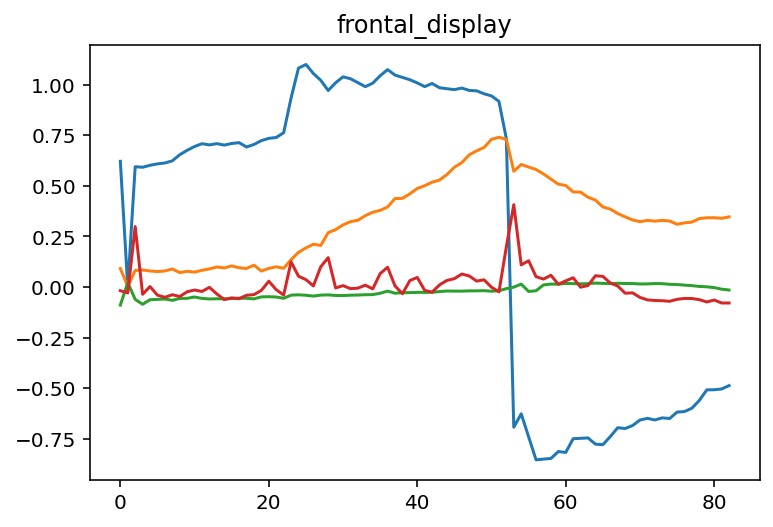

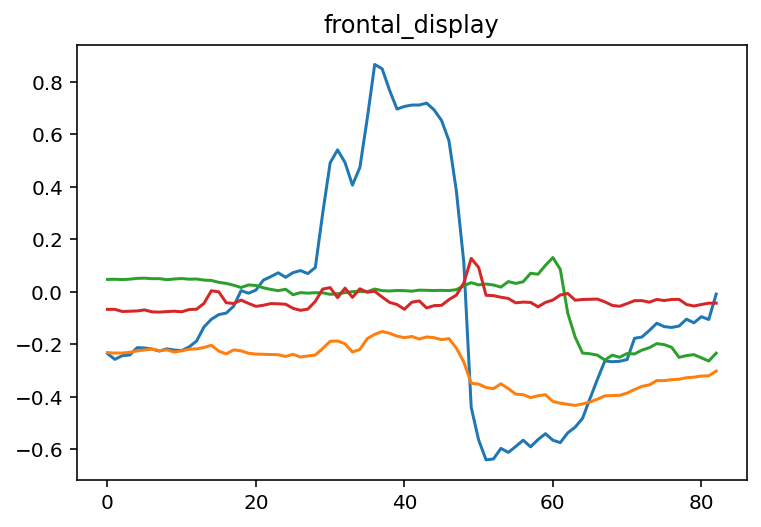

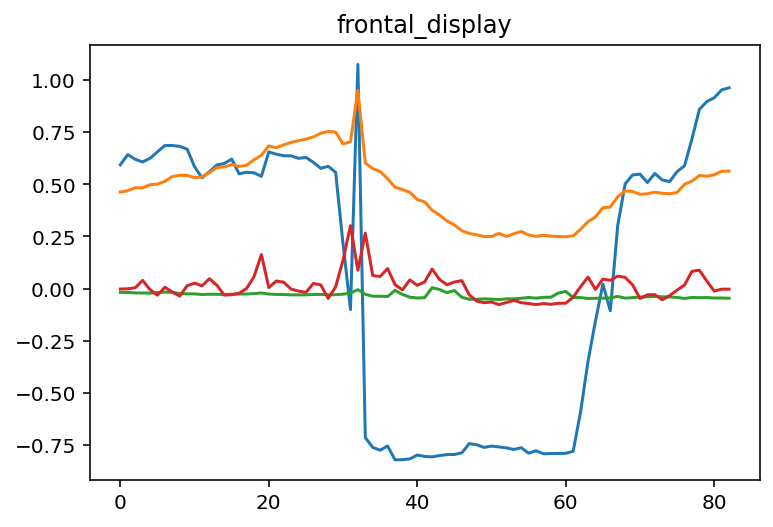

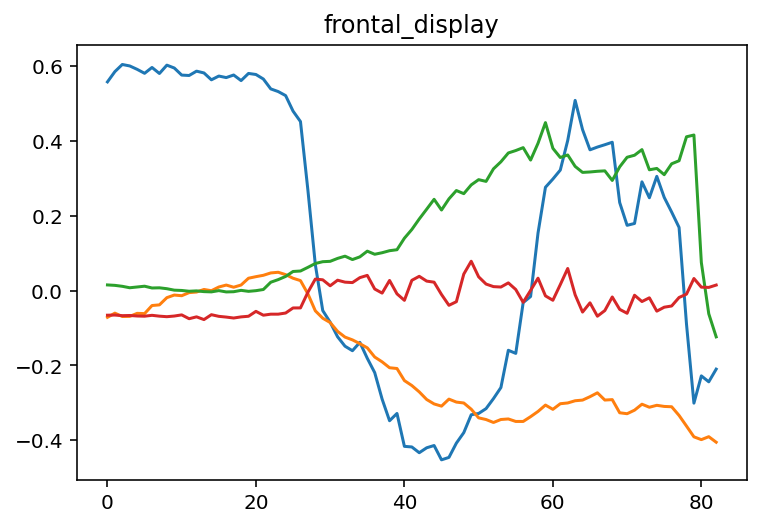

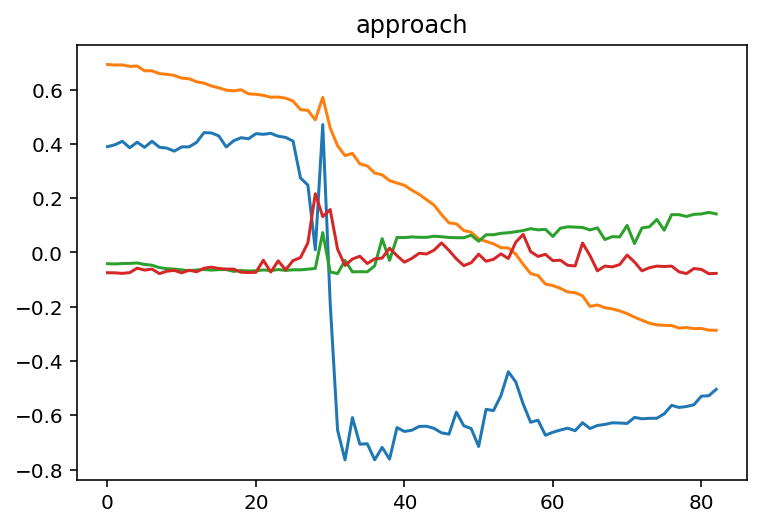

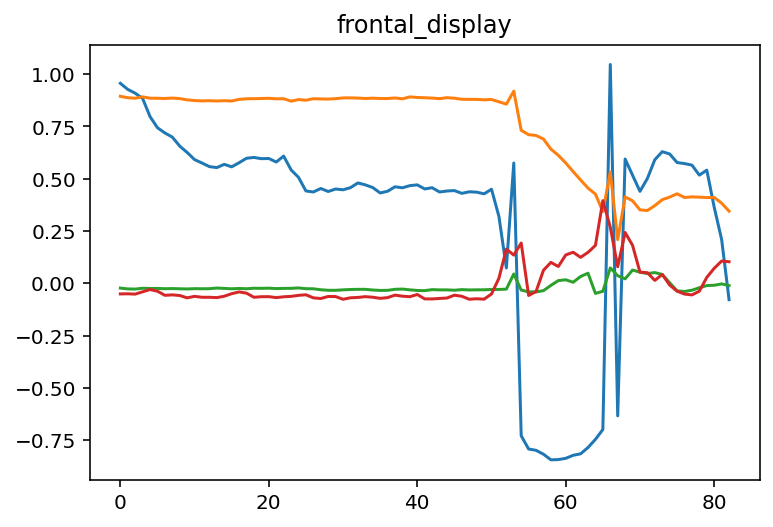

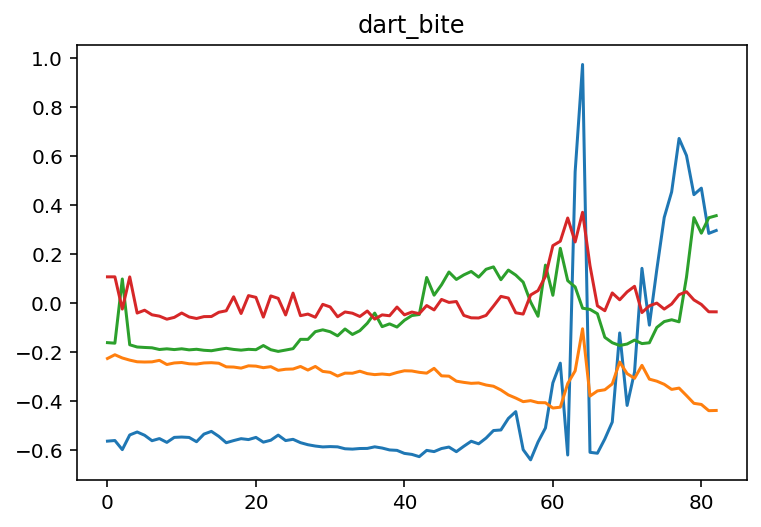

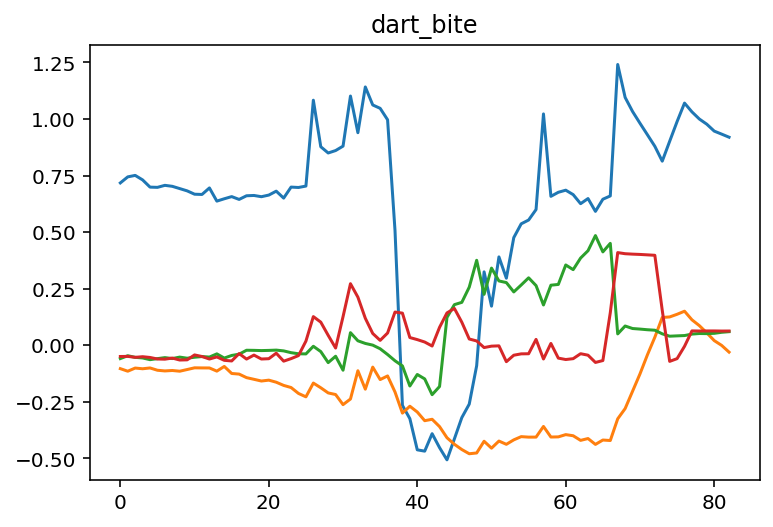

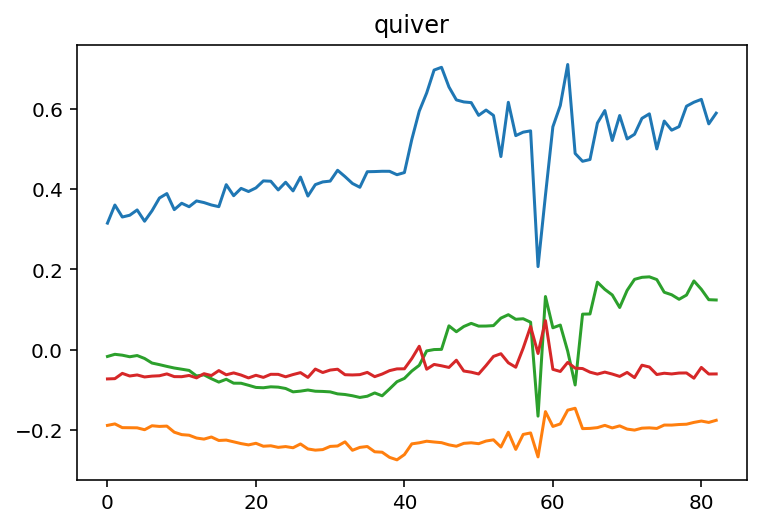

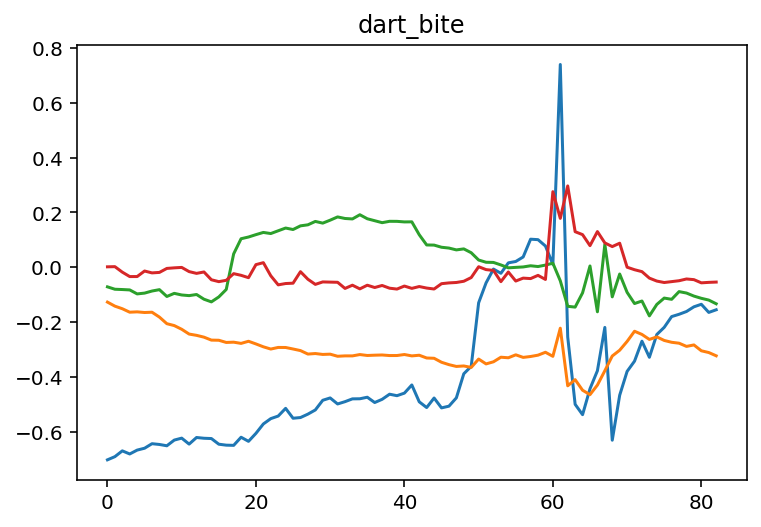

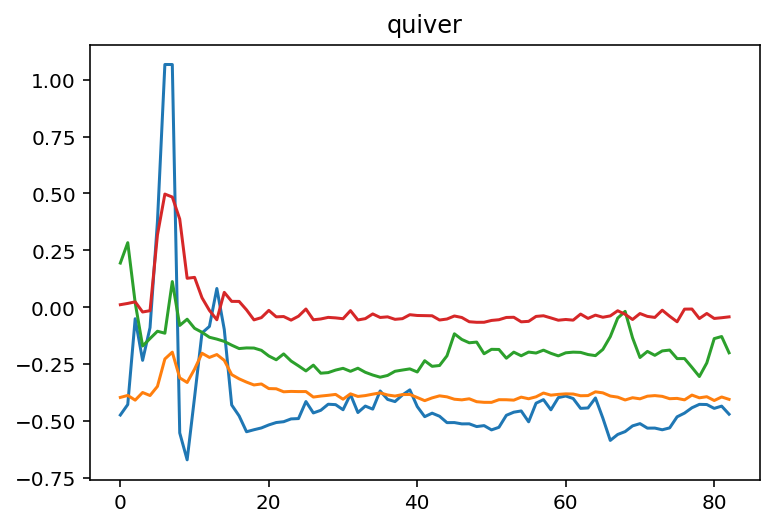

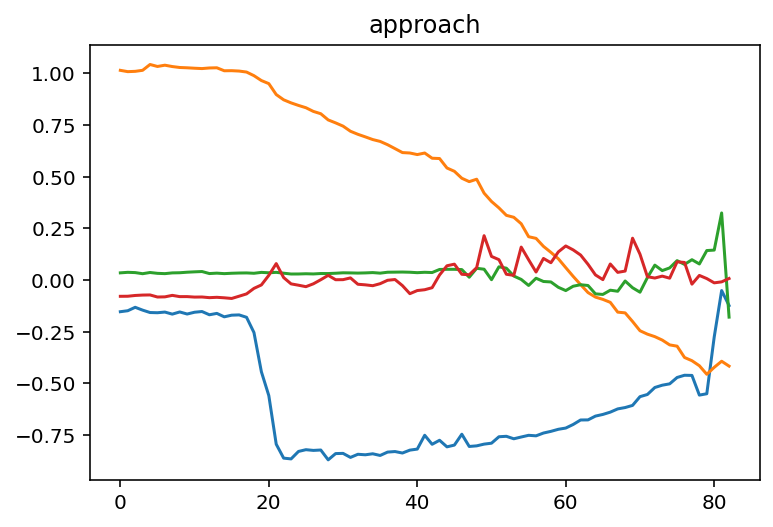

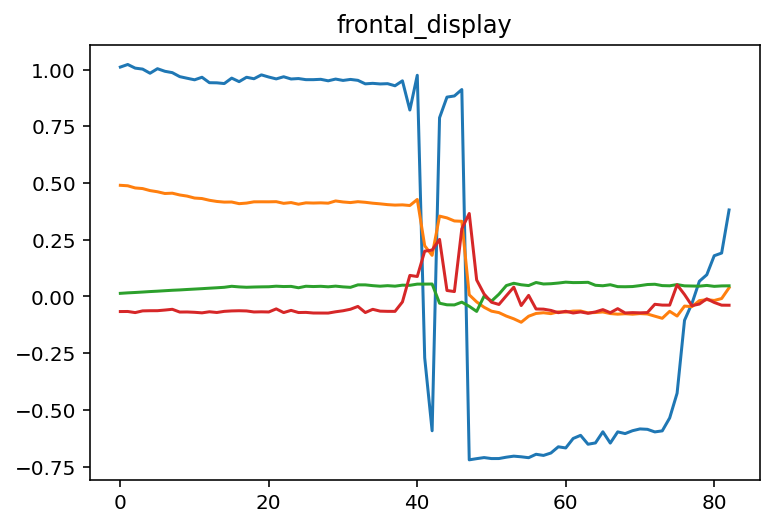

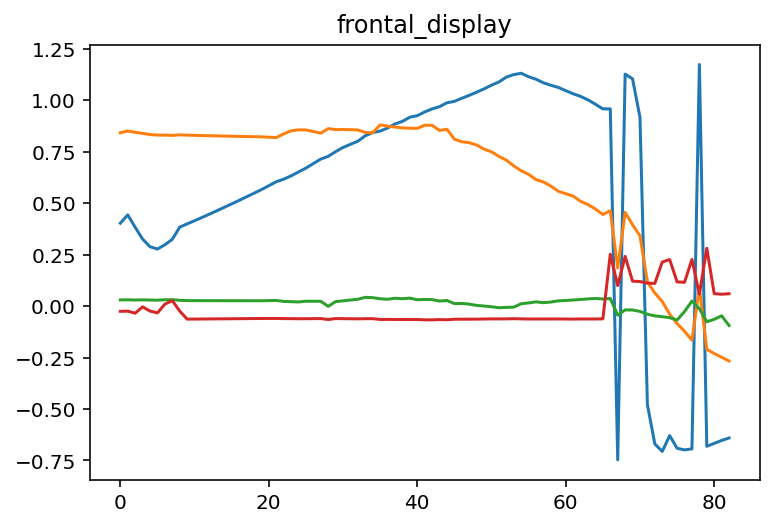

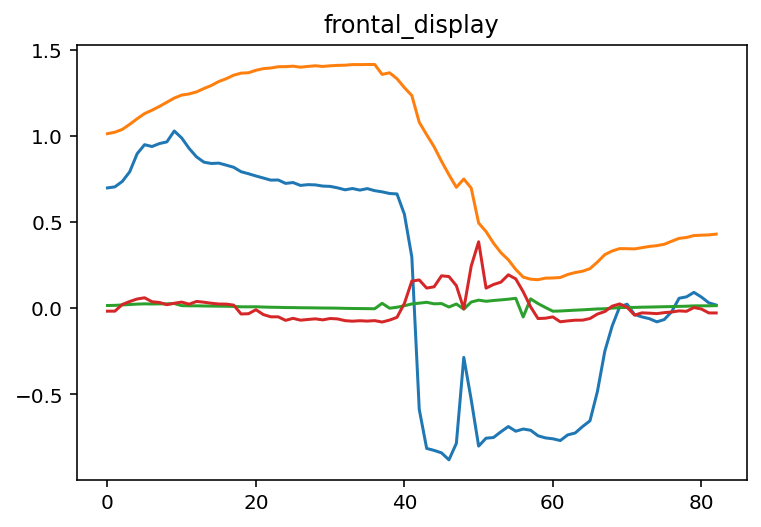

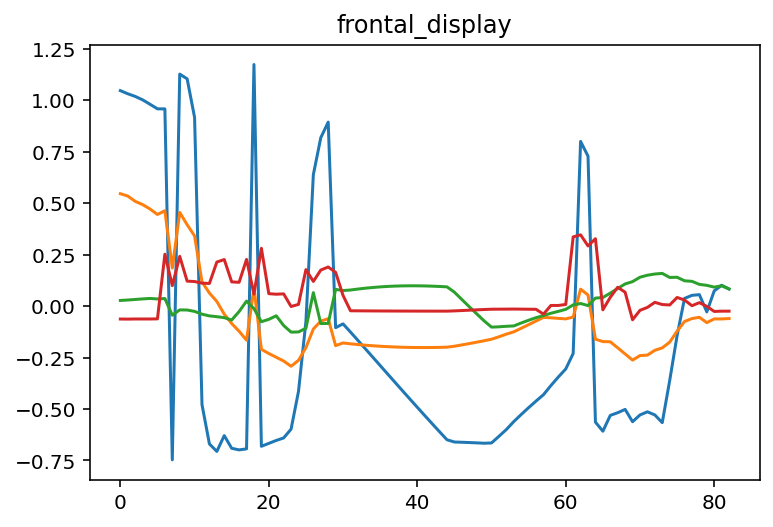

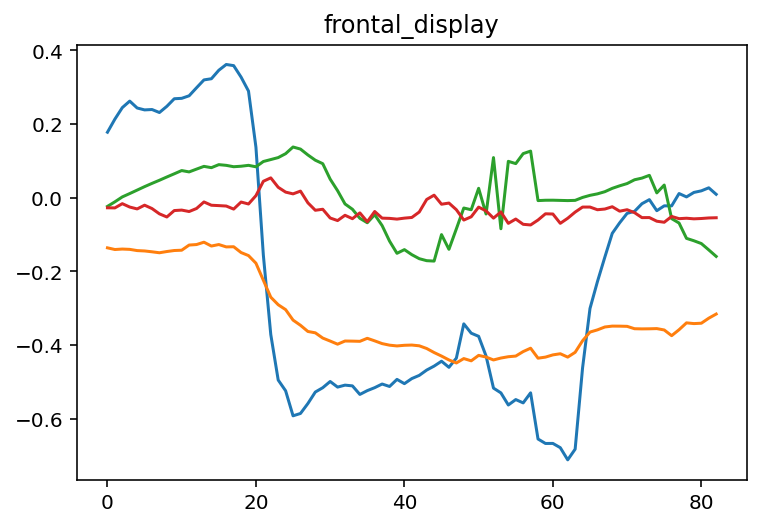

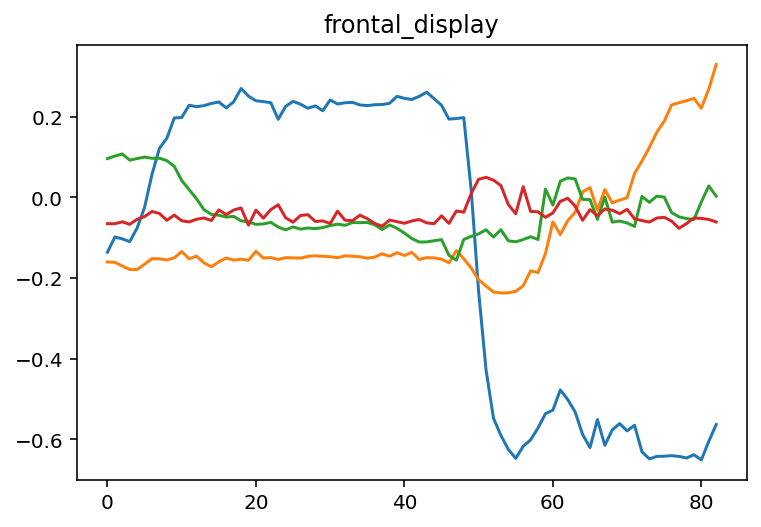

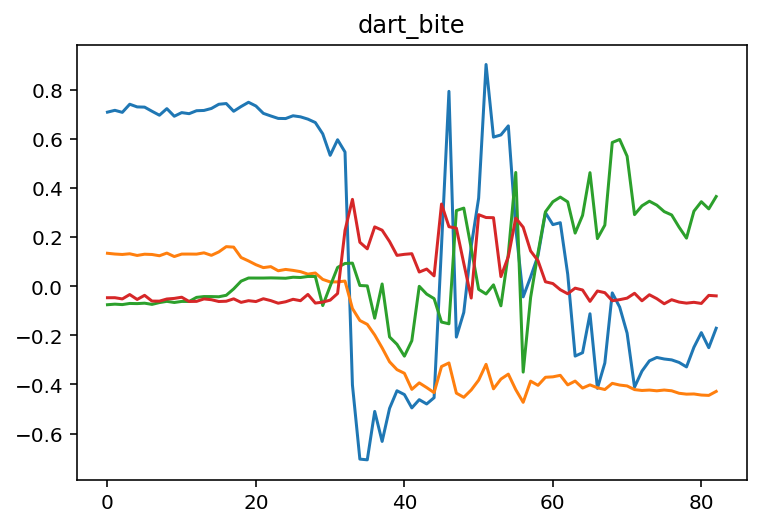

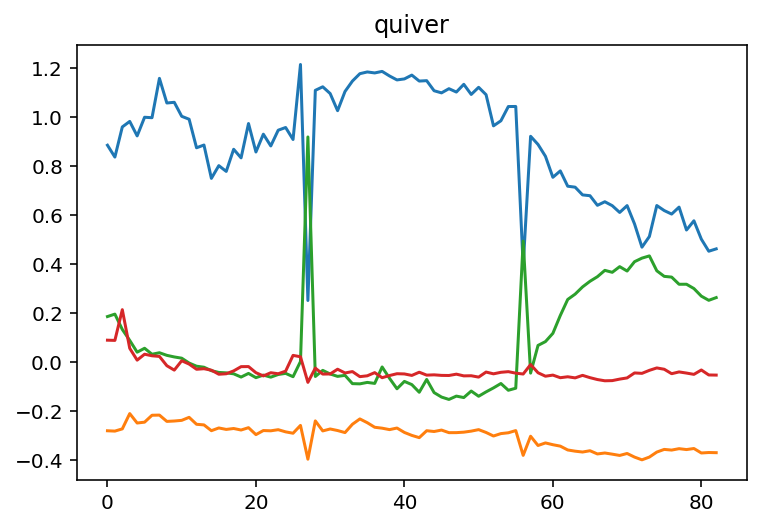

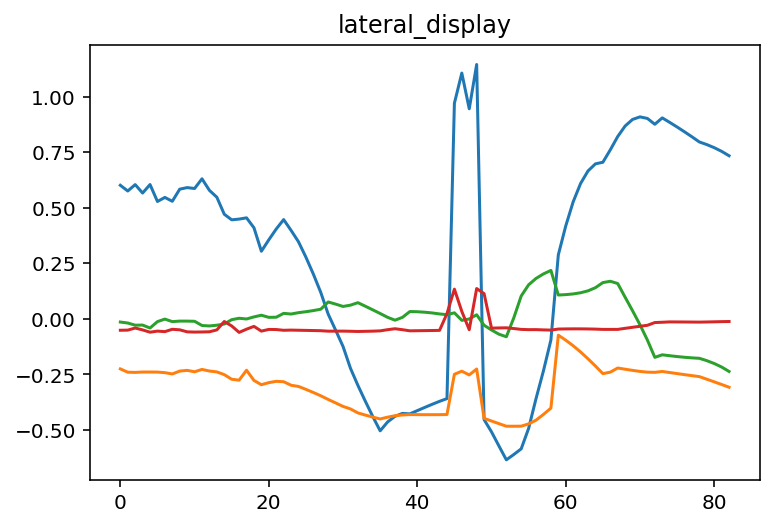

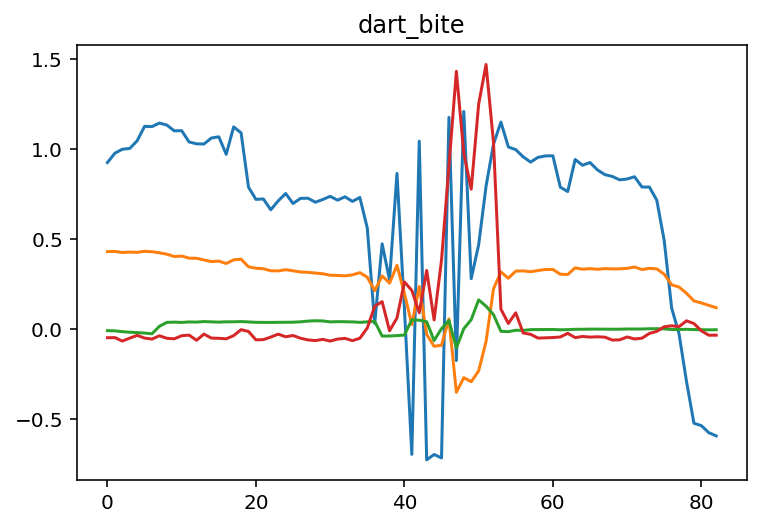

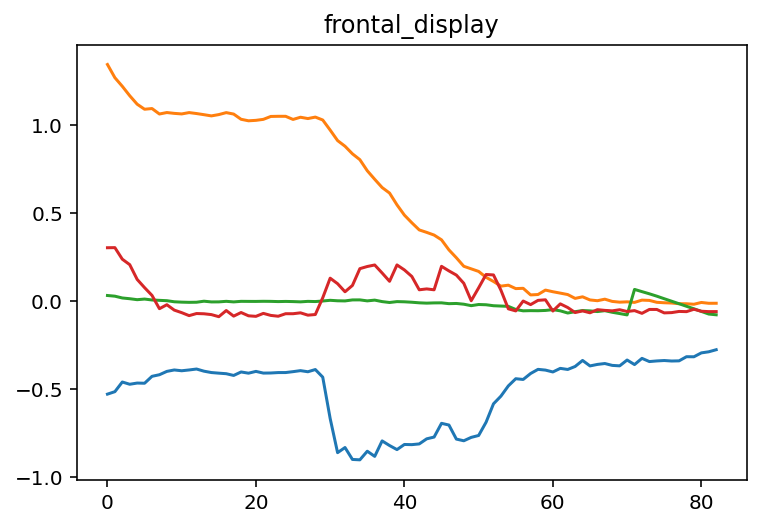

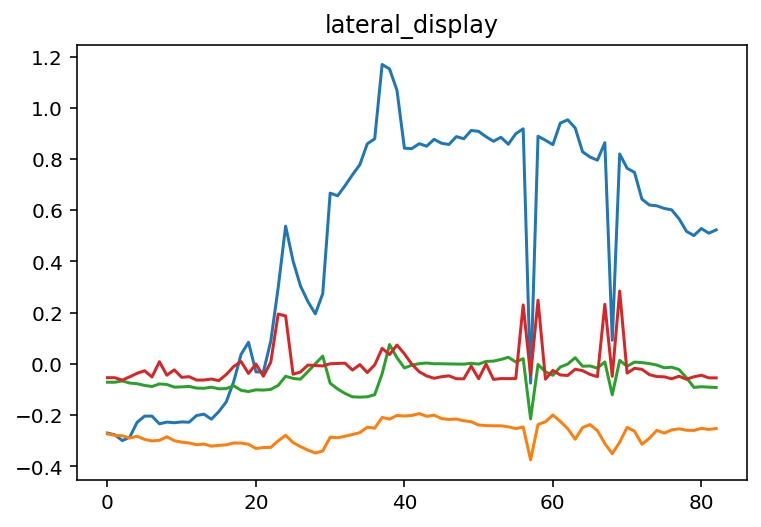

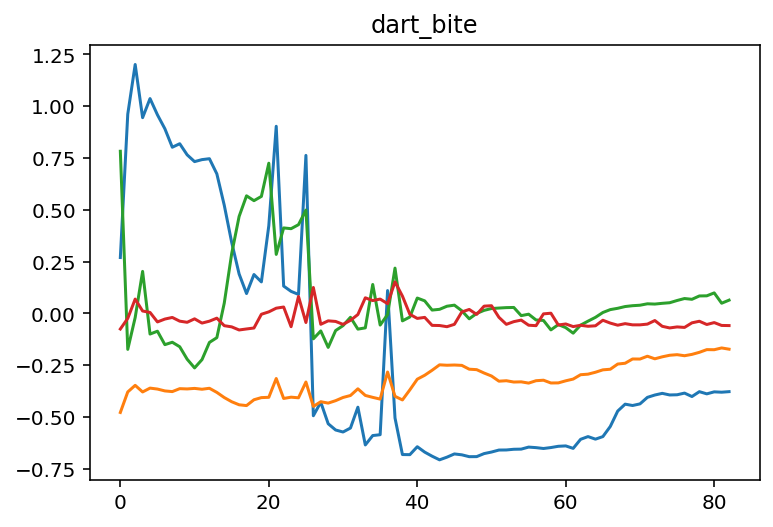

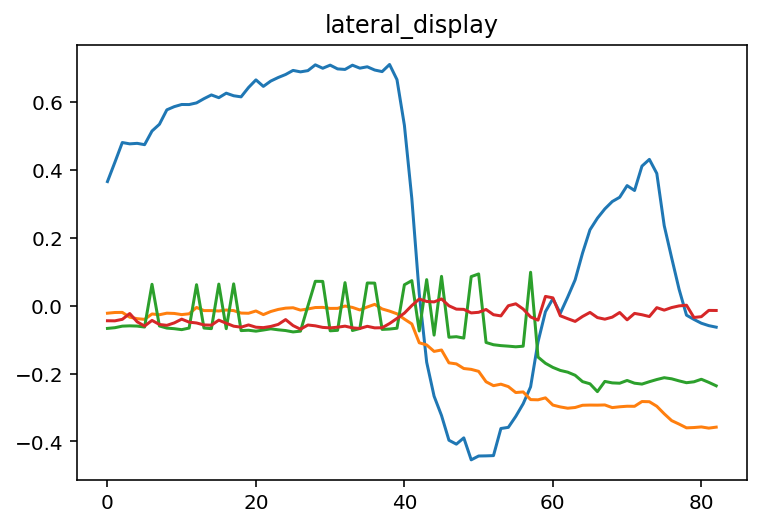

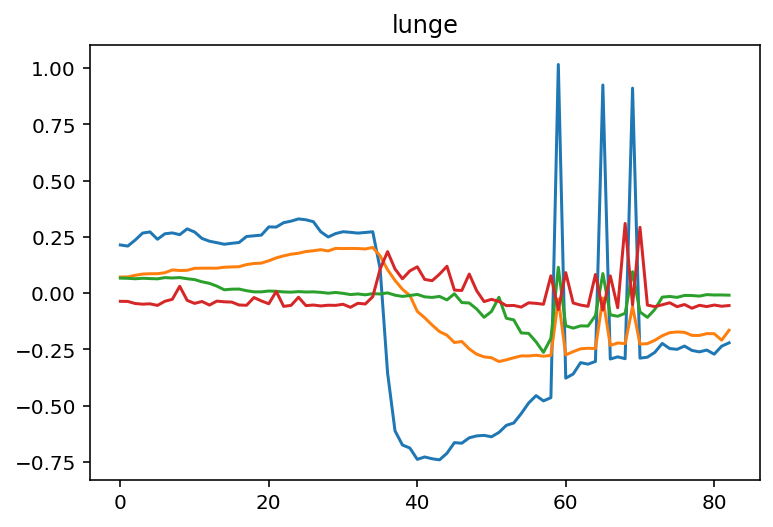

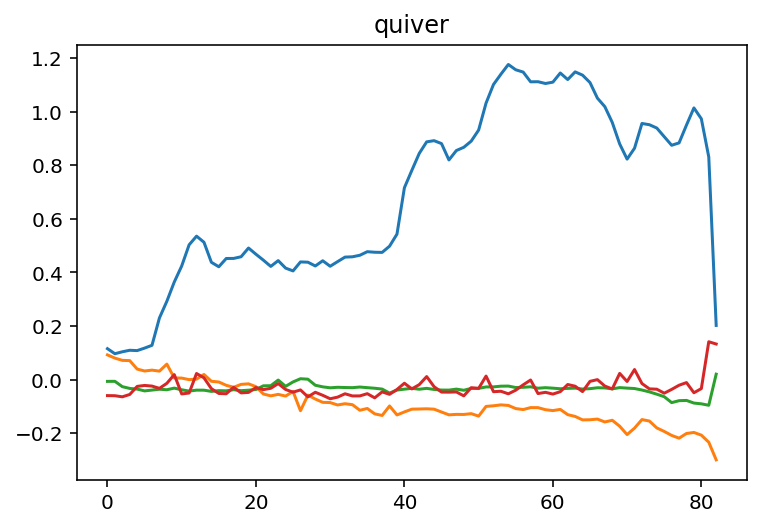

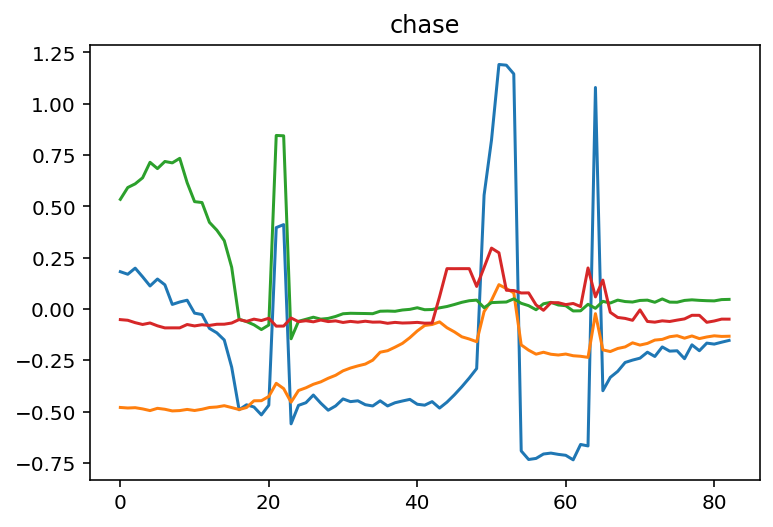

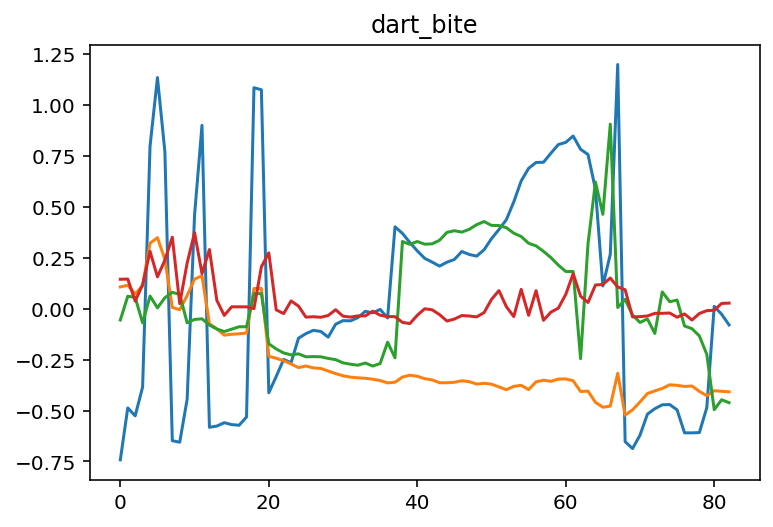

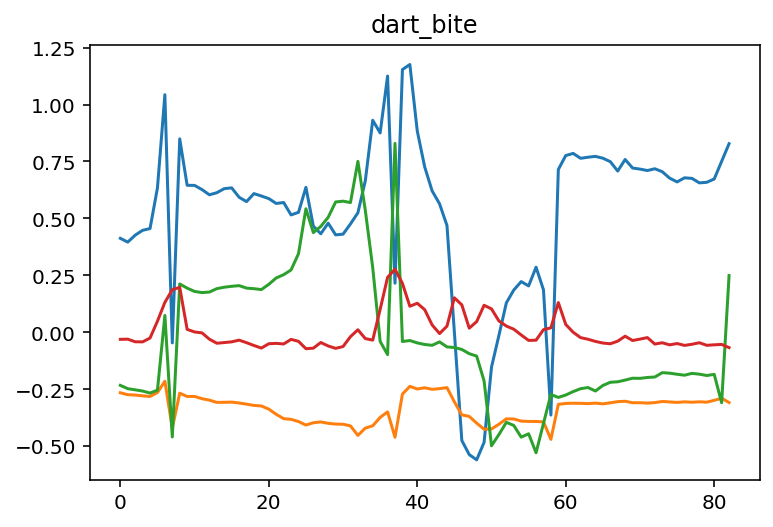

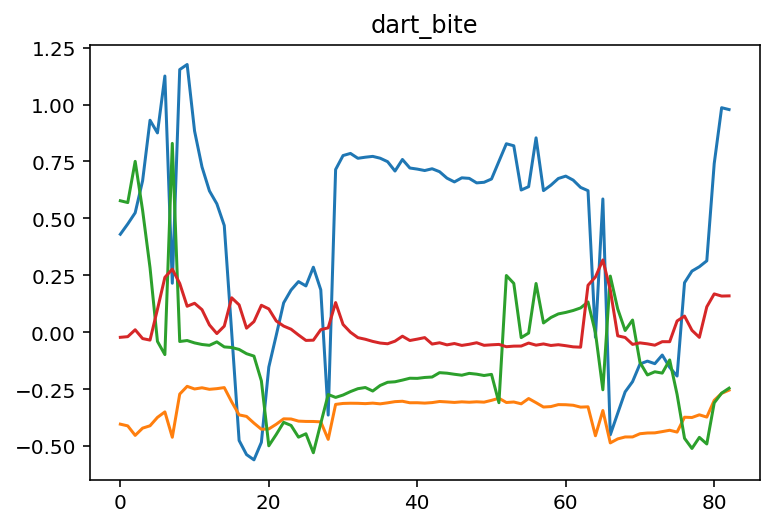

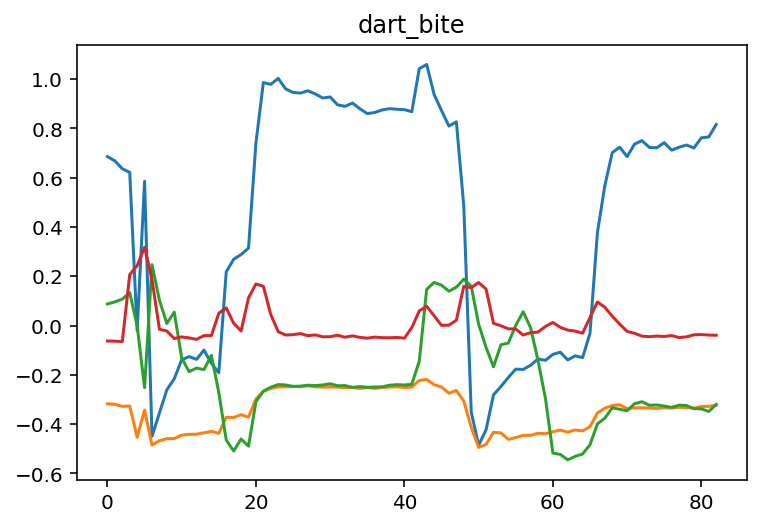

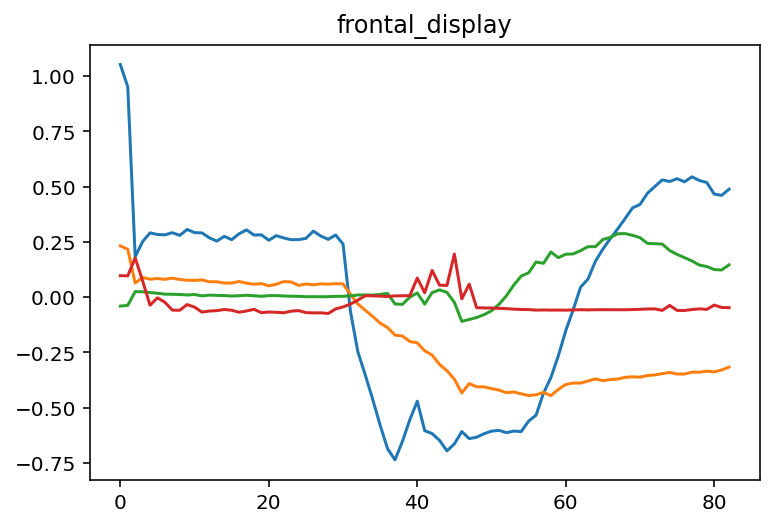

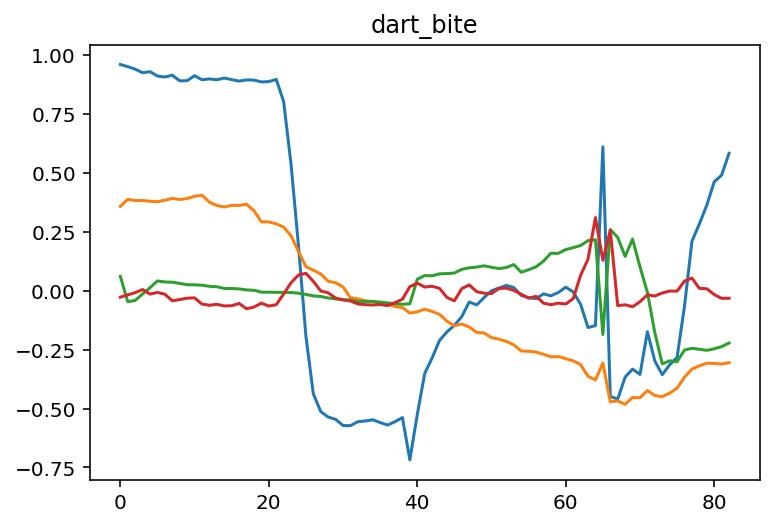

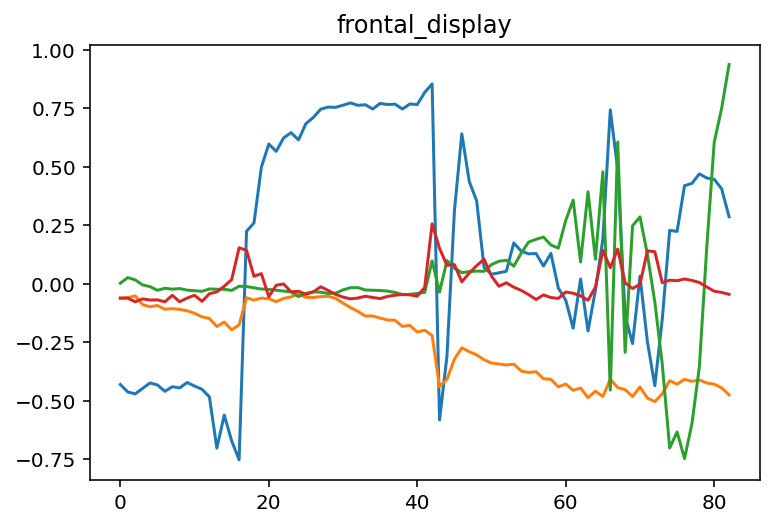

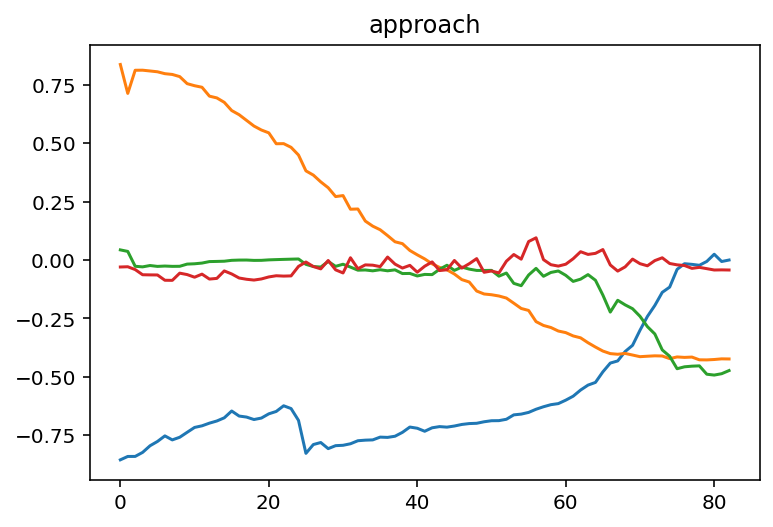

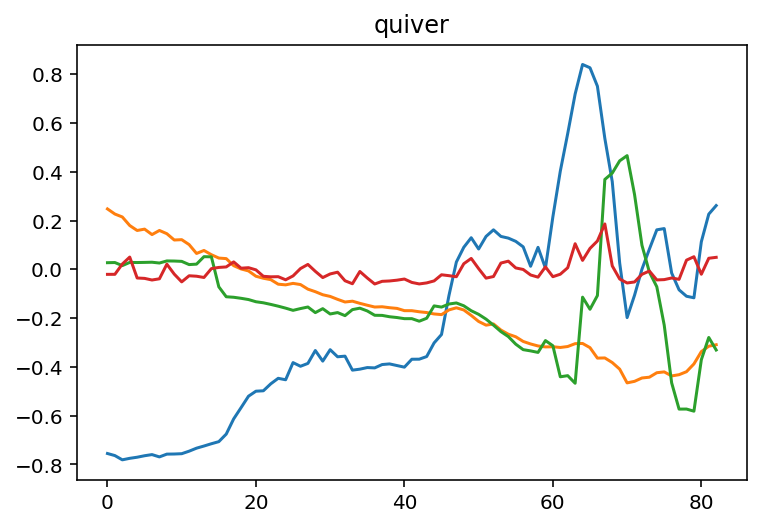

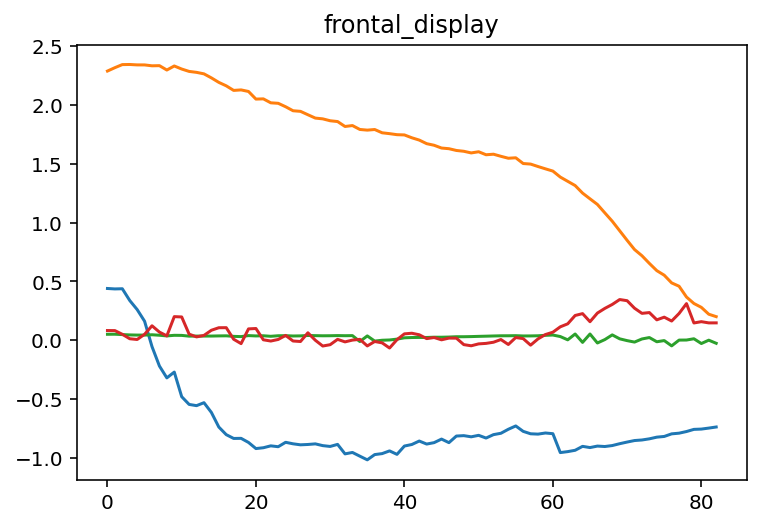

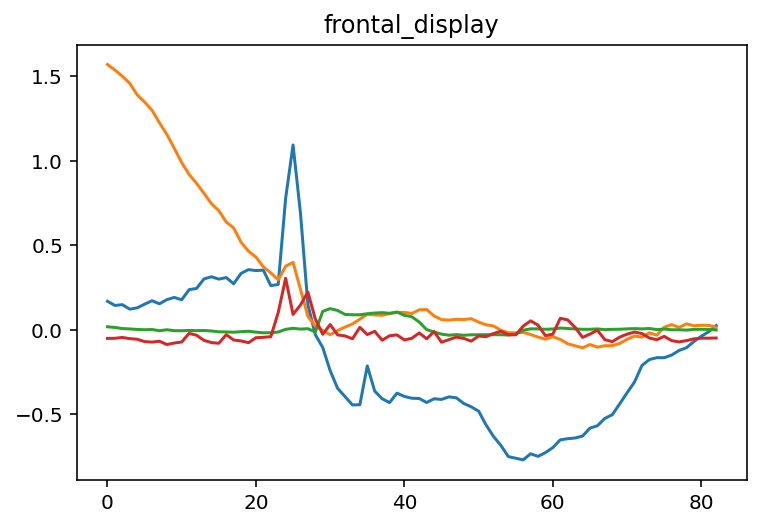

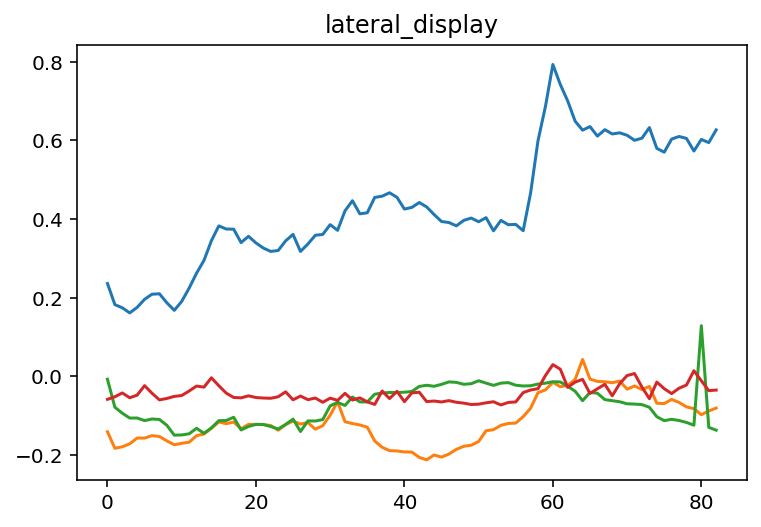

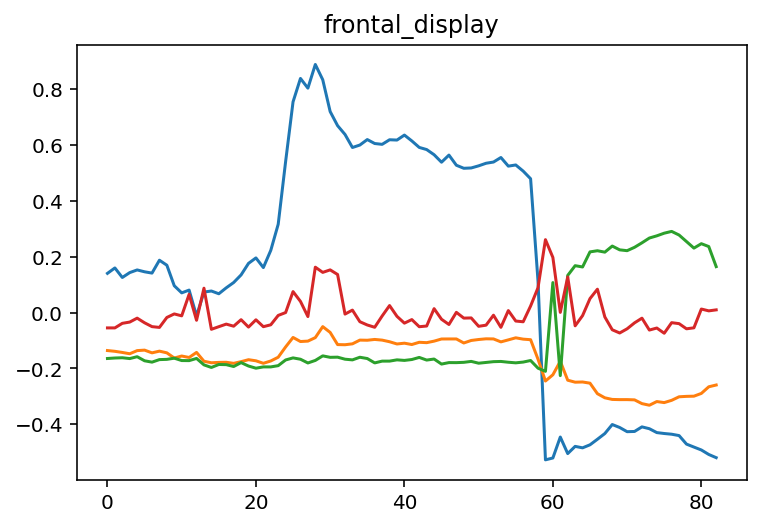

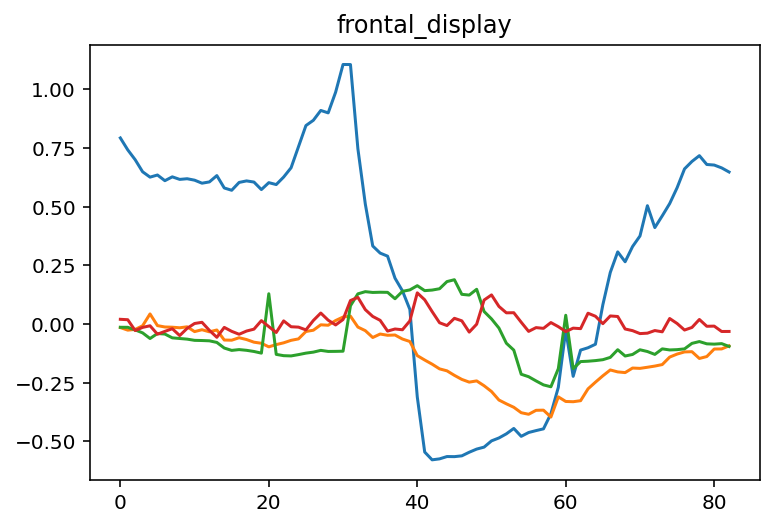

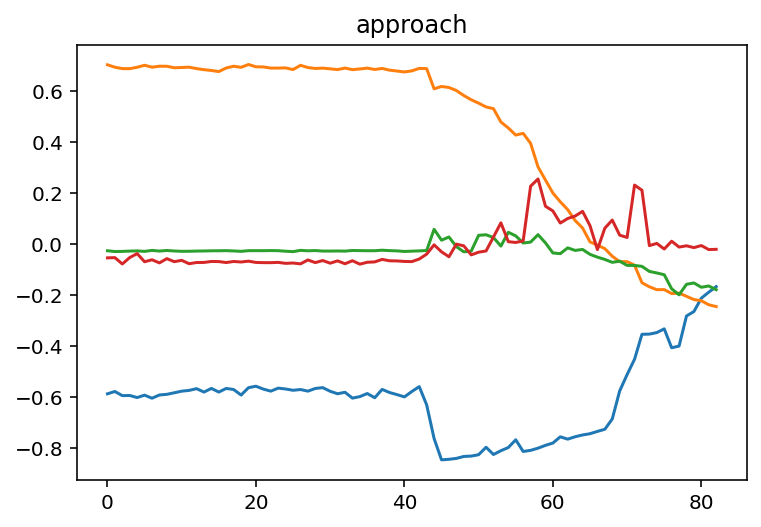

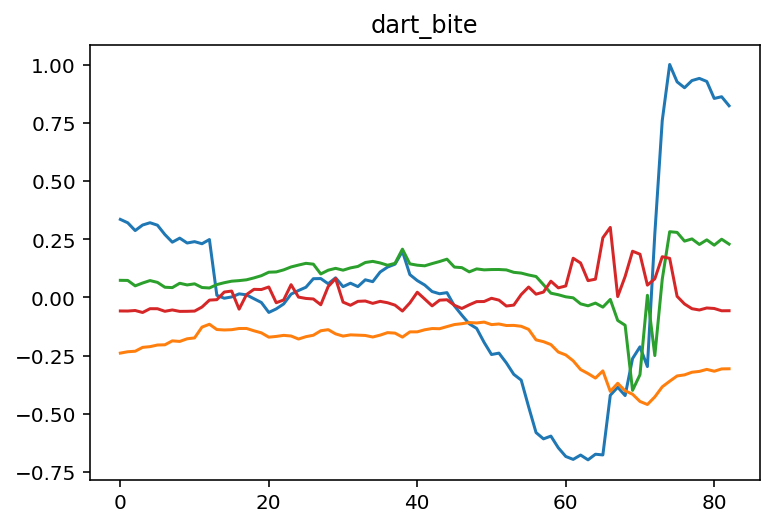

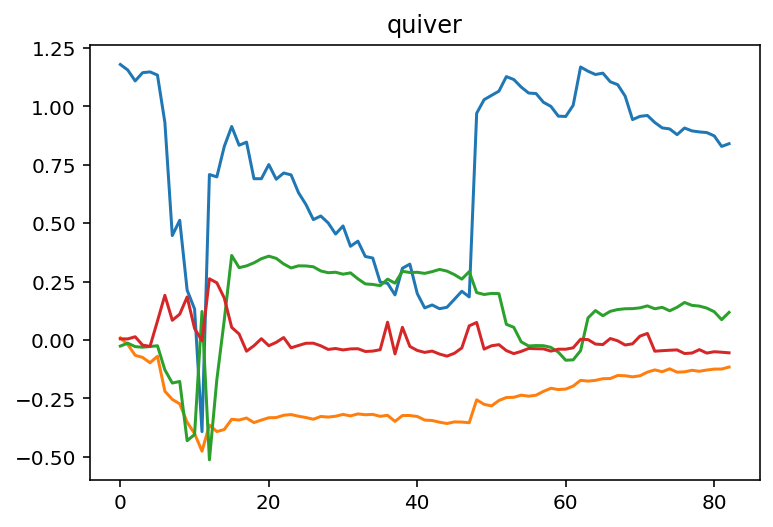

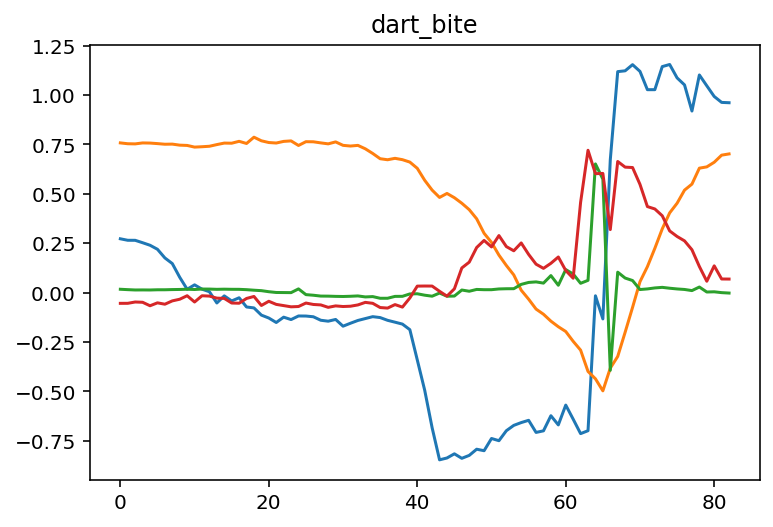

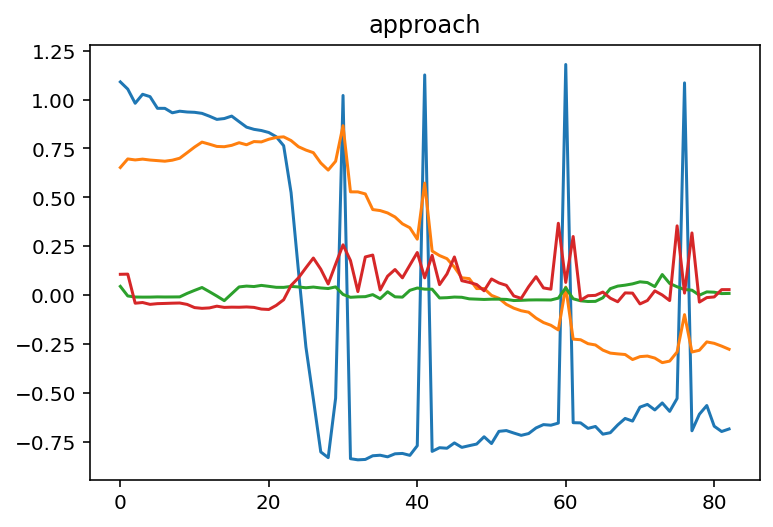

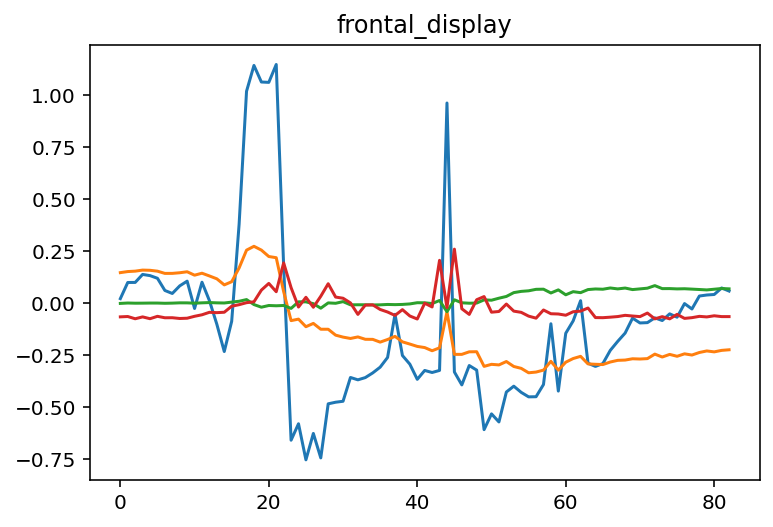

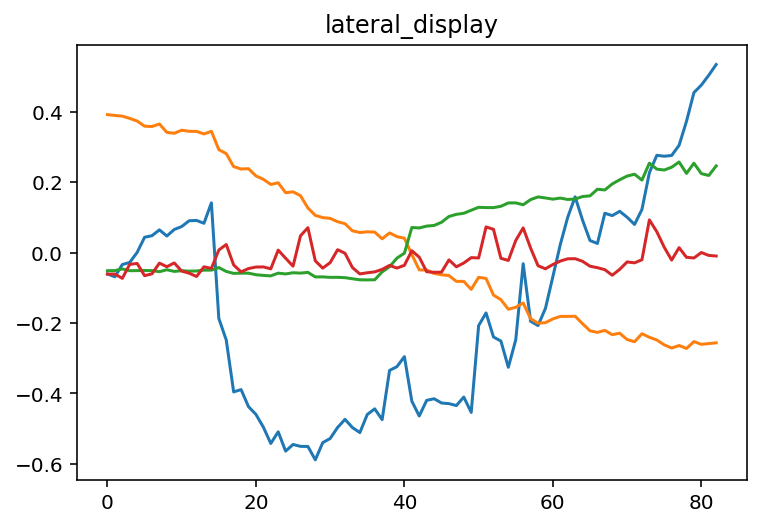

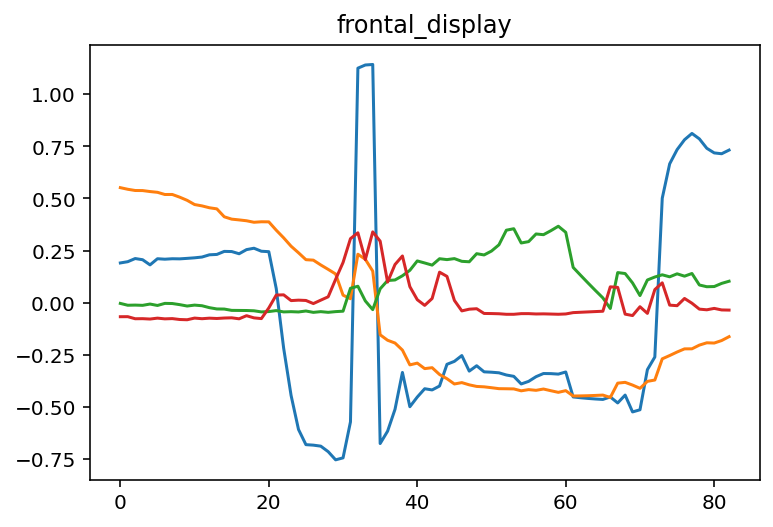

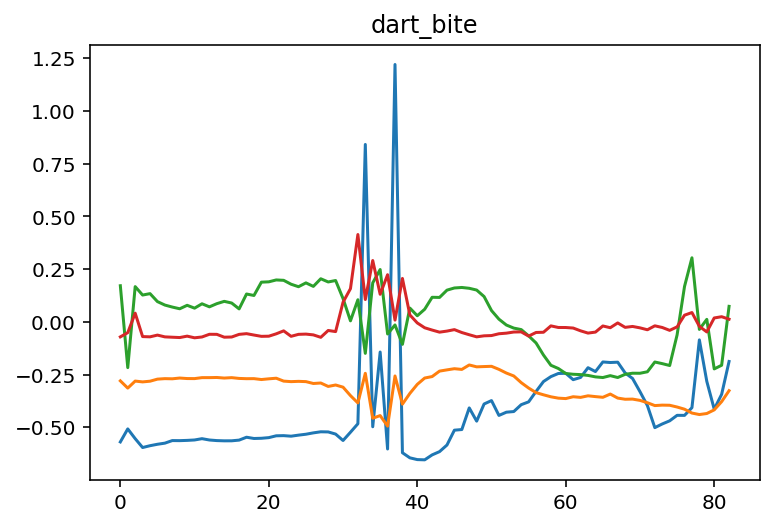

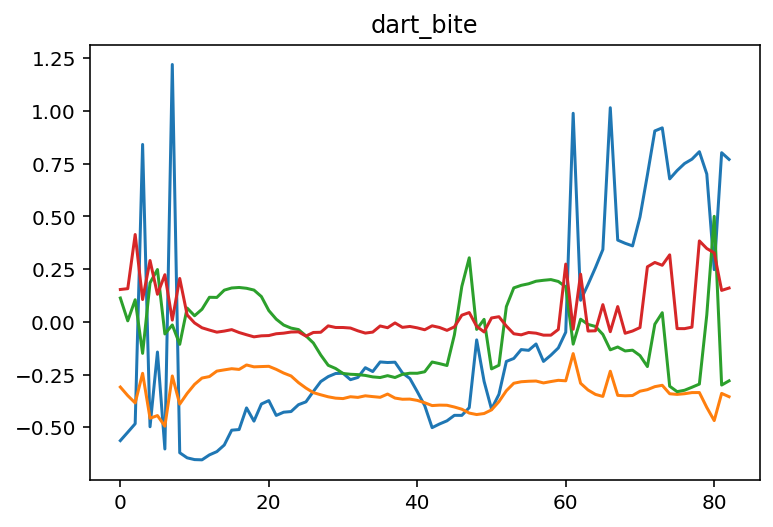

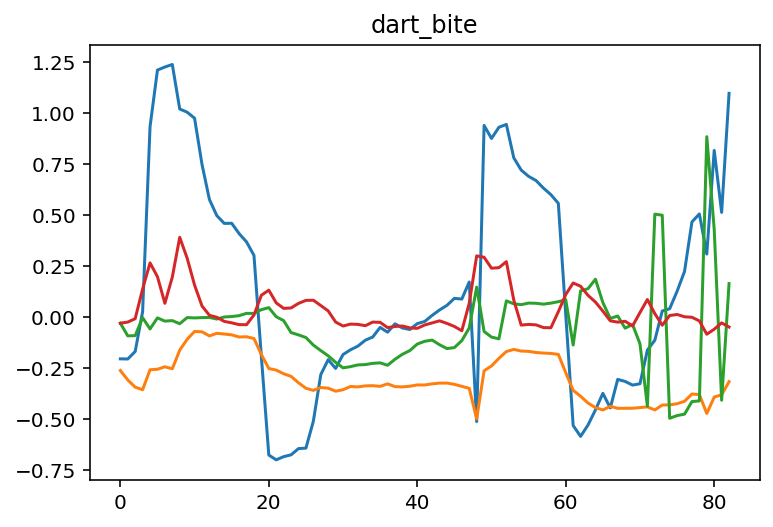

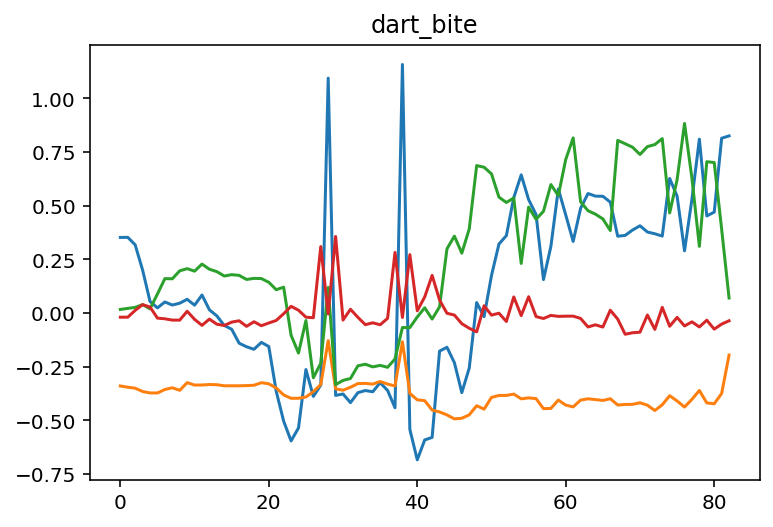

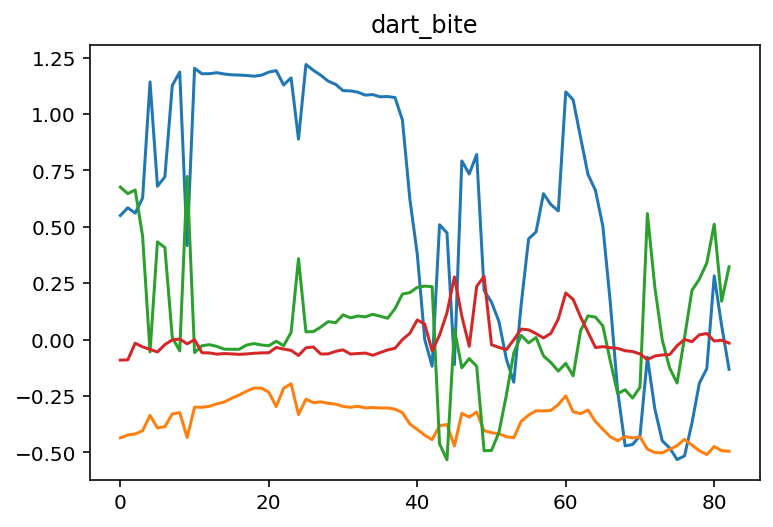

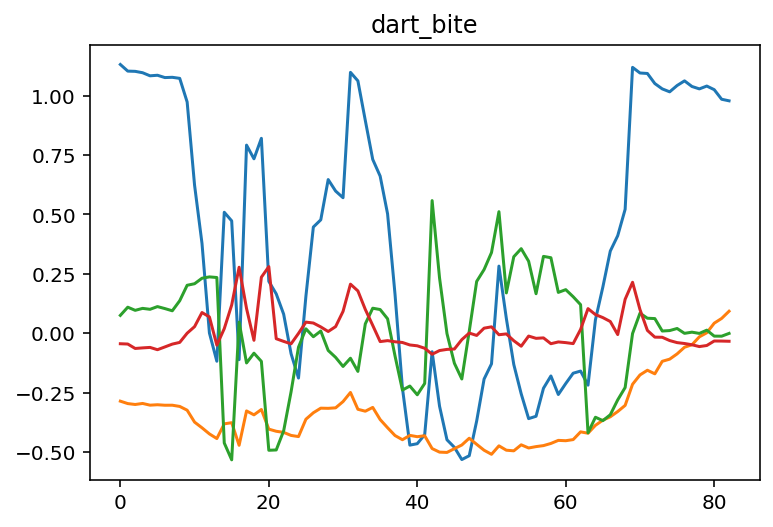

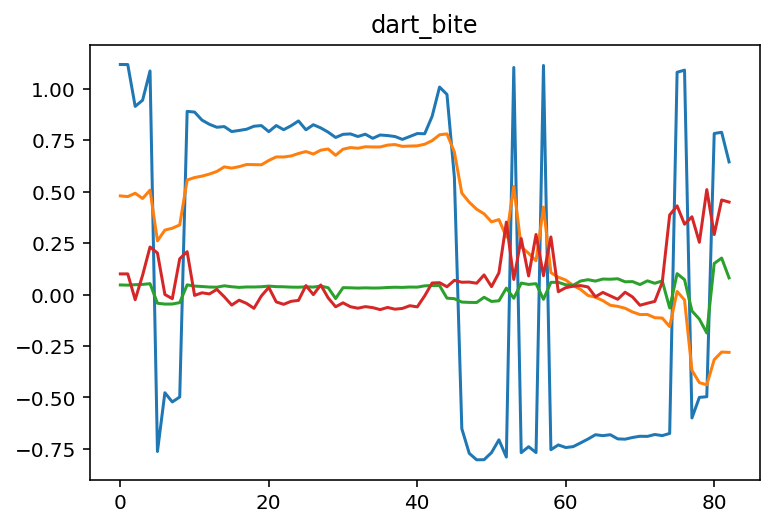

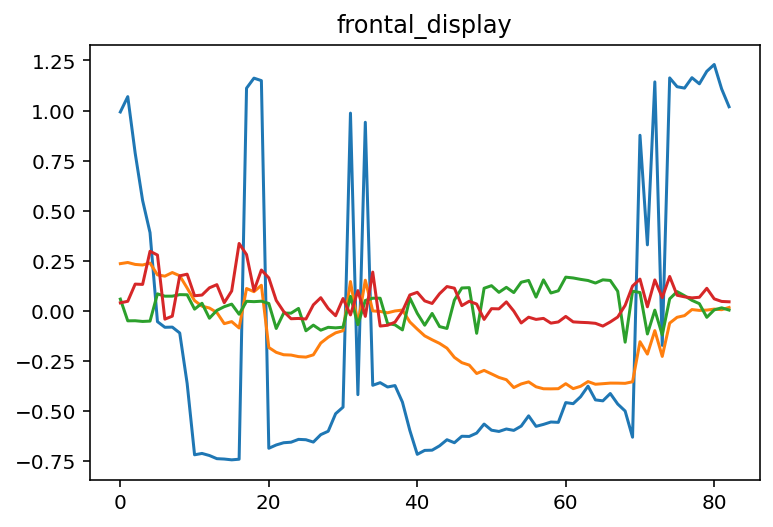

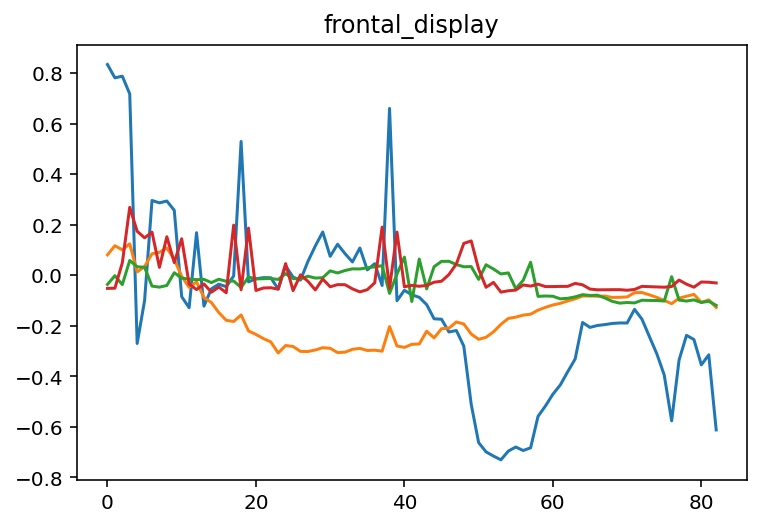

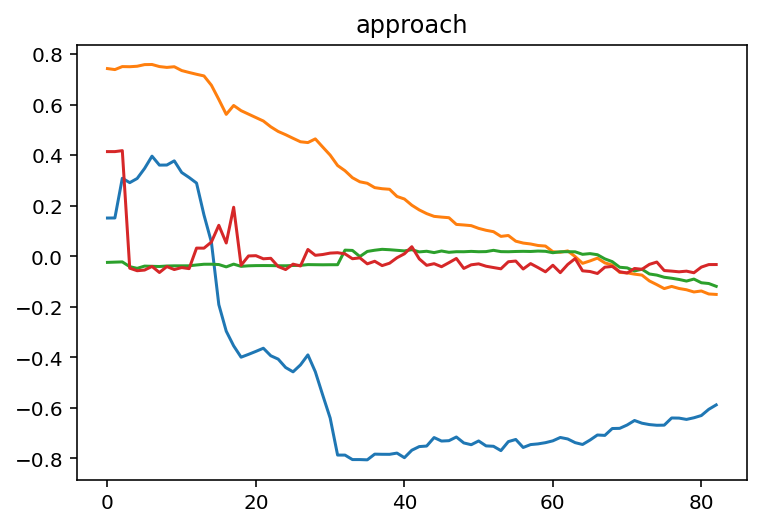

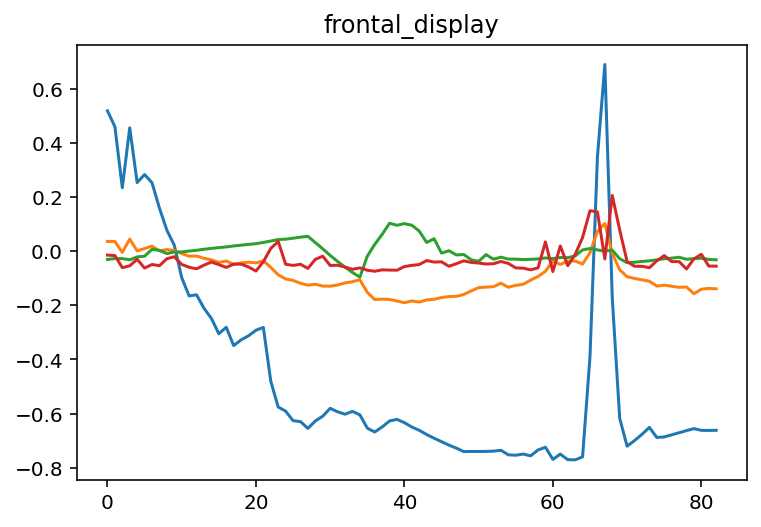

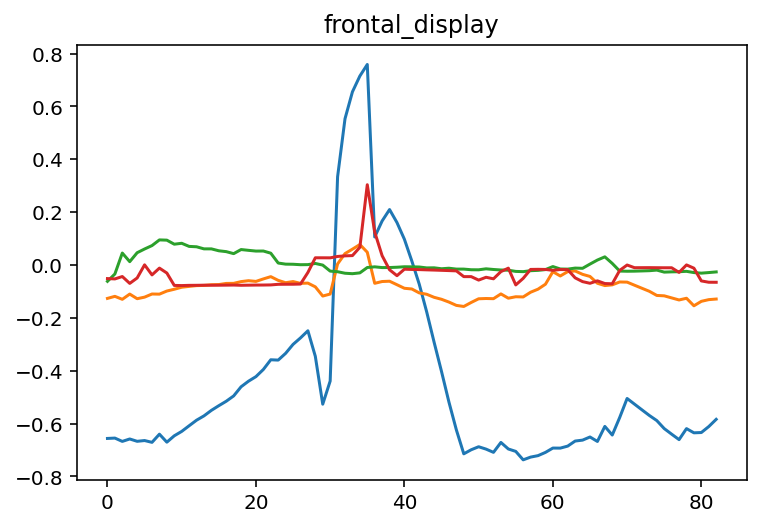

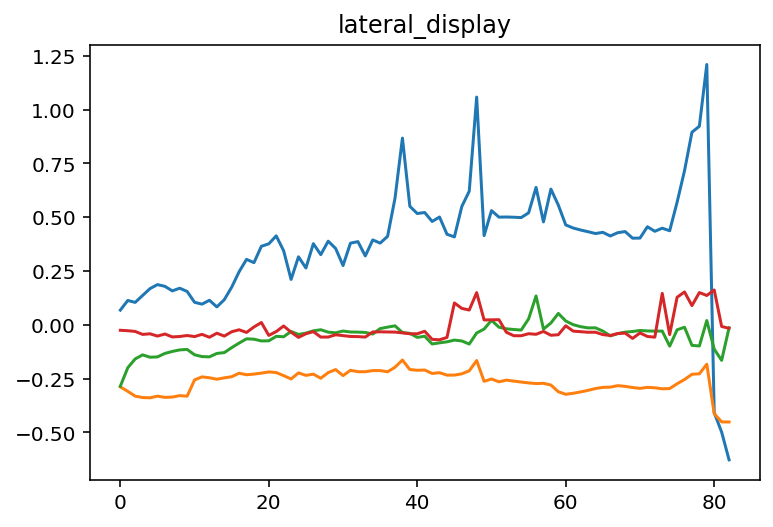

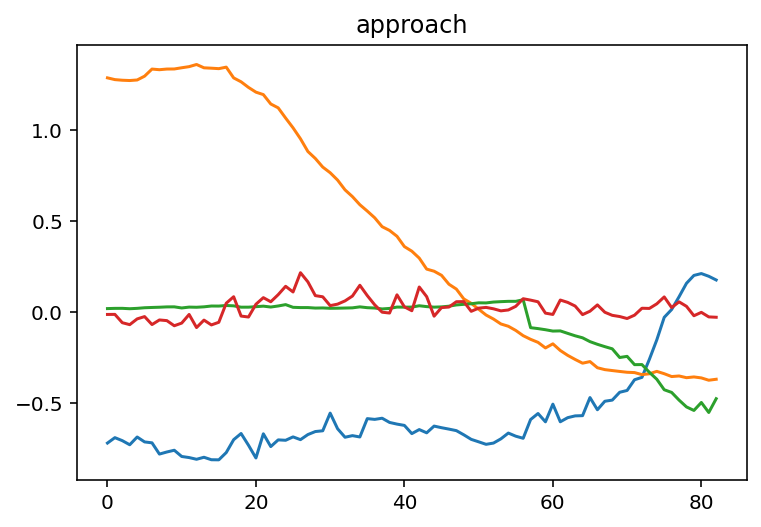

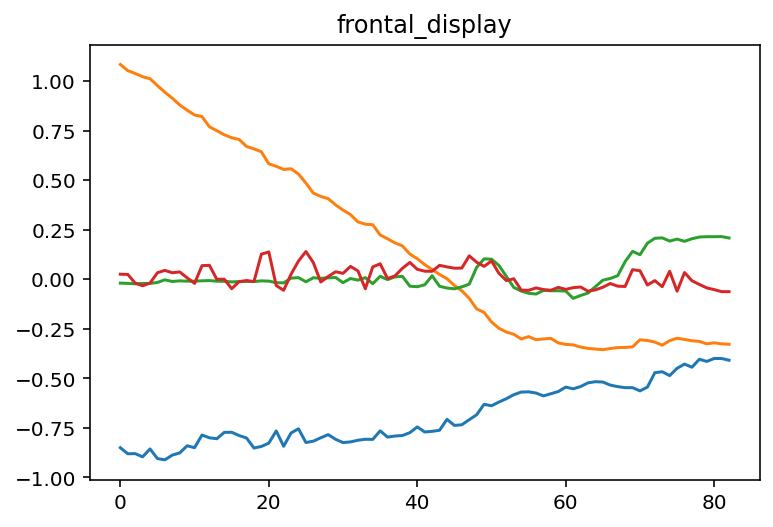

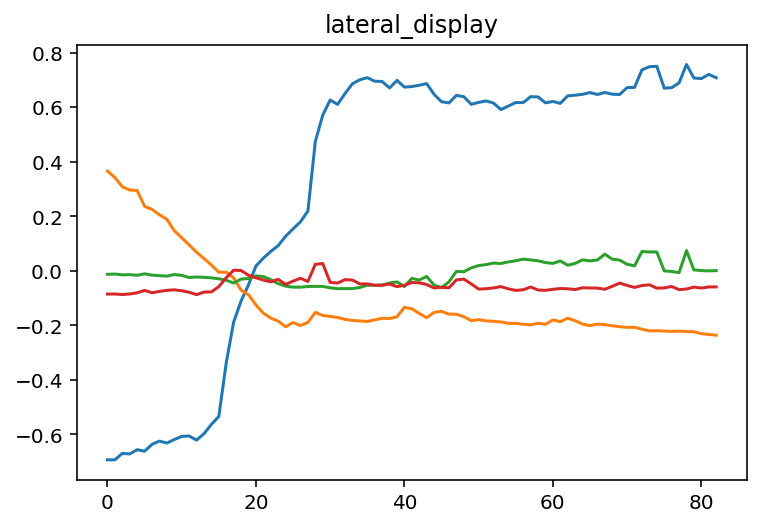

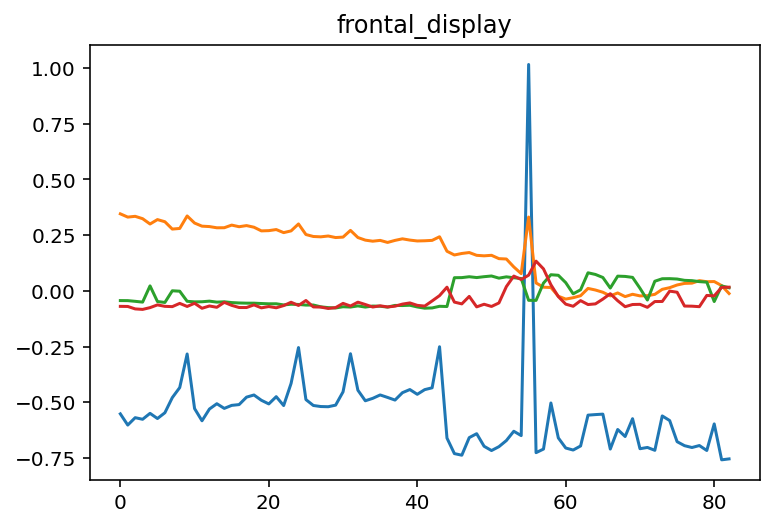

In [362]:
for m, b in zip(measurement_data, behavior_labels):
    plt.plot(pca.transform(scaler.transform(m))[:, :cutoff]);
    plt.gca().set_title(b)
    plt.show()
    

In [167]:
from pyTrajectory.trajectory_operations import get_posture_angles
from pyTrajectory.series_math import wrap_angles

In [124]:
from pyTrajectory.series_math import angles_to_unit_vectors, calculate_unit_vectors, unit_vectors_to_angles
from pyTrajectory.trajectory_operations import get_orientation_vectors

from pyTrajectory.trajectory_operations import get_posture_segments
from pyTrajectory.series_math import calculate_element_wise_magnitude

from pyTrajectory.series_math import rotate_unit_vectors

In [245]:
def reconstruct_interpolated_trajectory(trajectory, window_size=5):

    time_stamps = trajectory[cfg.key_time_stamp]
    time_stamps_full = np.arange(time_stamps.min(), time_stamps.max() + 1)

    body_angles_x, body_angles_y = angles_to_unit_vectors(get_posture_angles(trajectory, [0, 1, 2])).T
    body_angles_x_smooth = smooth_series(body_angles_x,
                               use_median_filter=True, median_filter_window_size=window_size,
                               use_savgol_filter=True, savgol_filter_window_size=window_size)
    body_angles_y_smooth = smooth_series(body_angles_y,
                               use_median_filter=True, median_filter_window_size=window_size,
                               use_savgol_filter=True, savgol_filter_window_size=window_size)
    posture_angles = unit_vectors_to_angles(calculate_unit_vectors(np.transpose([body_angles_x_smooth,
                                                                                 body_angles_y_smooth])))
    reconstructed_posture_angles = interpolate_series(posture_angles, time_stamps, time_stamps_full)

    # plt.plot(time_stamps, get_posture_angles(trajectory, [0, 1, 2]), '.k')
    # plt.plot(time_stamps_full, reconstructed_posture_angles, '.r')
    # plt.show()

    orientation_x, orientation_y = get_orientation_vectors(trajectory, [0, 1]).reshape(-1, 2).T
    orientation_x_smooth = smooth_series(orientation_x,
                               use_median_filter=True, median_filter_window_size=window_size,
                               use_savgol_filter=True, savgol_filter_window_size=window_size)
    orientation_y_smooth = smooth_series(orientation_y,
                               use_median_filter=True, median_filter_window_size=window_size,
                               use_savgol_filter=True, savgol_filter_window_size=window_size)
    orientation_vectors = np.transpose([orientation_x_smooth, orientation_y_smooth])
    reconstructed_orientation_vectors = calculate_unit_vectors(interpolate_series(orientation_vectors, time_stamps, time_stamps_full))
    orientation_angles = unit_vectors_to_angles(reconstructed_orientation_vectors)

    # plt.plot(time_stamps, unit_vectors_to_angles(get_orientation_vectors(trajectory, [0, 1])).ravel(), '.k')
    # plt.plot(time_stamps_full, orientation_angles, '.r')
    # plt.show()

    centroids = trajectory[cfg.key_keypoints].mean(axis=1)
    reconstructed_centroids = smooth_series(trajectory.interpolate()[cfg.key_keypoints].mean(axis=1),
                       use_median_filter=True, median_filter_window_size=window_size,
                       use_savgol_filter=True, savgol_filter_window_size=window_size)

    # plt.plot(*centroids.T, '.k')
    # plt.plot(*reconstructed_centroids.T, '.r')
    # plt.gca().set_aspect('equal')
    # plt.gca().invert_yaxis()
    # plt.show()

    segment_lengths = calculate_element_wise_magnitude(get_posture_segments(trajectory, [0, 1, 2]))
    segment_lengths_smooth = smooth_series(segment_lengths,
                               use_median_filter=True, median_filter_window_size=window_size,
                               use_savgol_filter=True, savgol_filter_window_size=window_size)
    reconstructed_segment_lengths = interpolate_series(segment_lengths_smooth, time_stamps, time_stamps_full)

    # plt.plot(time_stamps, segment_lengths[:, 0], '.k')
    # plt.plot(time_stamps, segment_lengths[:, 1], '.k')
    # plt.plot(time_stamps_full, reconstructed_segment_lengths[:, 0], '.r')
    # plt.plot(time_stamps_full, reconstructed_segment_lengths[:, 1], '.r')
    # plt.show()

    segment_front = reconstructed_orientation_vectors * reconstructed_segment_lengths[:, 0][:, np.newaxis]
    segment_back = rotate_unit_vectors(reconstructed_orientation_vectors.reshape(-1, 1, 2), -reconstructed_posture_angles).reshape(-1, 2) * reconstructed_segment_lengths[:, 1][:, np.newaxis]
    reconstructed_postures = np.stack([np.zeros(segment_front.shape),
                                       segment_front,
                                       segment_front + segment_back], axis=1)
    reconstructed_postures -= reconstructed_postures.mean(axis=1).reshape(-1, 1, 2)
    reconstructed_keypoints = reconstructed_centroids.reshape(-1, 1, 2) + reconstructed_postures

    reconstructed_trajectory = Trajectory().load(data={cfg.key_keypoints: reconstructed_keypoints, cfg.key_time_stamp: time_stamps_full})

    return reconstructed_trajectory

In [291]:
def get_posture_speed(trajectory):
    keypoints = trajectory[cfg.key_keypoints]
    dxy = (np.diff(keypoints[:-1], axis=0) + np.diff(keypoints[1:], axis=0)) / 2
    speed = np.sqrt(np.square(dxy).sum(axis=-1))
    speed = np.concatenate([speed[0].reshape(1, -1), speed, speed[-1].reshape(1, -1)], axis=0)
    return speed

In [73]:
from copy import deepcopy


def apply_to_series(series, func, copy=True):
    if copy:
        series = deepcopy(series)
    for idx in np.ndindex(series.shape[1:]):
        s = series[(slice(None), *idx)]
        s = func(s)
        series[(slice(None), *idx)] = s
    return series


def smooth_rolling_func(trajectory, func):
    time_stamps = trajectory[cfg.key_time_stamp]
    time_stamps_full = np.arange(time_stamps.min(), time_stamps.max() + 1)
    keypoints_full = np.zeros((len(time_stamps_full), *trajectory[cfg.key_keypoints].shape[1:]))
    keypoints_full[:] = np.nan
    keypoints_full[np.isin(time_stamps_full, time_stamps)] = trajectory[cfg.key_keypoints]
    keypoints_smoothed = apply_to_series(keypoints_full, func)
    trajectory_smoothed = Trajectory().load(data={cfg.key_time_stamp: time_stamps_full, cfg.key_keypoints: keypoints_smoothed})
    return trajectory_smoothed